In [45]:
#import json file and convert to dataframe
import pandas as pd
import json
from pandas.io.json import json_normalize


#load json file
with open('C:/Users/MehmetCemAkuras/Desktop/3rd Semester/Project Management and Data Analytics Lab/Tweets2GPT/Data/Raw/tweets_ws23_v1.json') as json_file:
    json_data = json.load(json_file)


In [46]:
#show loaded json data
json_data

[{'source_created_at': '2020-09-18 21:56:20.798000',
  'author_id': '593731316',
  'text': '@DSisourath The Thameslink core between London St Pancras and London Blackfriars in rush hours onlybut the in cab rubbish rarely works',
  'source': 'sprinklr',
  'language': 'en',
  'longitude': -0.12574,
  'latitude': 51.50853,
  'id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
  'labels': {'topic': [{'tweet_id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
     'user_id': 'Z003XDCS',
     'relevant': True,
     'topic': 'service',
     'ground_truth': True,
     'id': '8655353b-cc71-1e89-95d5-1c4e6bf200e1'}],
   'sentiment': [{'tweet_id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
     'user_id': 'Z003XDCS',
     'sentiment': 'negative',
     'ground_truth': True,
     'id': '5ee4d218-65a9-70a0-0964-a5b00e594a41'}]}},
 {'source_created_at': '2020-10-13 07:31:53.122000',
  'author_id': '745583289520496640',
  'text': '@DulwichHistory Loving the complaint about people having to wait 10 minutes for a train

In [47]:
def get_all_keys(obj):
    keys = set()
    if isinstance(obj, dict):
        keys.update(obj.keys())
        for value in obj.values():
            keys.update(get_all_keys(value))
    elif isinstance(obj, list):
        for item in obj:
            keys.update(get_all_keys(item))
    return keys

# Get all unique keys
all_keys = get_all_keys(json_data)

# Convert the set to a list to see all unique keys
all_keys_list = list(all_keys)
print(all_keys_list)


['id', 'text', 'source_created_at', 'topic', 'language', 'latitude', 'relevant', 'source', 'labels', 'tweet_id', 'user_id', 'source_id', 'sentiment', 'longitude', 'author_id', 'ground_truth']


In [48]:
def flatten_json(y):
    """Flatten a nested JSON object"""
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(y)
    return out

# Flatten the JSON data
flattened_data = [flatten_json(entry) for entry in json_data]

# Convert the list of flattened dictionaries to a DataFrame
df = pd.DataFrame(flattened_data)

# Show the DataFrame
df

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels_topic_0_tweet_id,labels_topic_0_user_id,labels_topic_0_relevant,labels_topic_0_topic,labels_topic_0_ground_truth,labels_topic_0_id,labels_sentiment_0_tweet_id,labels_sentiment_0_user_id,labels_sentiment_0_sentiment,labels_sentiment_0_ground_truth,labels_sentiment_0_id,source_id
0,2020-09-18 21:56:20.798000,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,True,service,True,8655353b-cc71-1e89-95d5-1c4e6bf200e1,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,negative,True,5ee4d218-65a9-70a0-0964-a5b00e594a41,NaN
1,2020-10-13 07:31:53.122000,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,True,delays,True,8aee5c86-6e93-24d4-6d9d-d8a9f2f19cef,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,negative,True,2f8d741f-59cf-d1ab-27f9-5537a9718f94,NaN
2,2020-10-26 19:27:24.695000,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,True,toilets,True,2d54f18a-442d-b59b-9daf-0490dc64d21a,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,negative,True,be479c30-17c3-220f-8eae-eaf6fc874431,NaN
3,2020-10-26 19:28:49.281000,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,True,toilets,True,01db4b72-b21c-60f9-b627-5a47df56655a,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,negative,True,6df4ba5c-952f-732f-2a7e-4cc6f7d56f61,NaN
4,2020-09-28 11:59:41.212000,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,True,seats,True,4fe5177f-8347-1726-c2e9-cc183f16d5b1,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,neutral,True,e5aa618a-c554-6bdb-cb5b-bcdadcaa4e98,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16944,2019-07-11 07:34:35,24940900,Haha oh man the audio corruption on @TLRailUK ...,brandwatch,en-GB,NaN,NaN,b47948df-1732-7021-ee77-238f839a2ea0,b47948df-1732-7021-ee77-238f839a2ea0,Z003XDCS,True,announcements,True,aca953e8-bec4-216a-5a6e-e3530e420fa9,b47948df-1732-7021-ee77-238f839a2ea0,Z003XDCS,neutral,True,be02e403-49c2-e366-3324-09f1696ce526,1149220424313708544
16945,2020-08-10 11:19:10.181000,63559912,@TLRailUK SweetIs there a plug to charge my ph...,sprinklr,en,-0.12574,51.50853,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,Z003XDCS,True,plugs,True,e170272d-5e5c-6ce7-ba7c-748aa56073d7,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,Z003XDCS,neutral,True,a0c0e79c-11ee-4700-45b2-dcf7234f0a10,NaN
16946,2020-08-29 09:51:10.833000,277455263,@TLRailUK now there are far fewer commuters ha...,sprinklr,en,-0.12574,51.50853,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,Z003XDCS,True,tables,True,356eb822-07b7-ca2d-0087-56284ce2e95b,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,Z003XDCS,neutral,True,786bb503-8ec0-6a21-ea3f-6995ceb7e3e0,NaN
16947,2020-11-02 12:06:06.967000,3050957613,@geofftech I am voting for Thameslink. 1. in a...,sprinklr,en,-0.12574,51.50853,859ab156-cad3-3bf0-4b6d-de494b483501,859ab156-cad3-3bf0-4b6d-de494b483501,Z003XDCS,True,toilets,True,3f6f4be1-37c7-17cb-56c3-2e91b0ae237a,859ab156-cad3-3bf0-4b6d-de494b483501,Z003XDCS,neutral,True,399d6906-75db-1150-0f34-414c6cf917cf,NaN


***IT IS SEEN THAT TITLES NEED TO BE REEVALUTATED***

In [16]:
#show labels_topic_0_topic's unique values
df['labels_topic_0_topic'].unique()

array(['service', 'delays', 'toilets', 'seats', 'wifi',
       'tickets/seat_reservations', 'none', 'station', 'covid', 'doors',
       'train_general', 'air conditioning', 'brakes', 'tables', 'plugs',
       'noise', 'windows', 'hvac', 'announcements', 'vandalism', 'floor',
       'roof', 'handrails'], dtype=object)

In [17]:
#count columns and rows
df.shape

(16949, 20)

In [18]:
#Count total number of tweets in text column
df['text'].count()

16949

IT IS SEEN THAT ALL ROWS HAVE A TEXT

In [19]:
#Find total number of retweets in text column
df['text'].str.contains('RT').sum()

37

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming df is your DataFrame with a column named 'text'

# Create a TF-IDF vectorizer to convert text into numerical vectors
tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF vectorizer to 'text' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Compute cosine similarity
similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Set thresholds for similarity (between 90% and 99%)
lower_threshold = 0.9
upper_threshold = 0.999999

# Keep track of visited rows to avoid duplicates
visited = set()

# Find similar rows within the specified similarity range
similar_pairs = []

for i in range(len(similarities)):
    for j in range(i+1, len(similarities)):
        if lower_threshold <= similarities[i, j] <= upper_threshold:
            if i not in visited and j not in visited:
                similar_pairs.append((i, j))
                visited.add(i)
                visited.add(j)

# Print similar pairs
for pair in similar_pairs:
    print(f"Row {pair[0]} and Row {pair[1]} are similar.")

# Print the total number of similar pairs
total_similar_pairs = len(similar_pairs)
#Save total 


Row 111 and Row 400 are similar.
Row 129 and Row 133 are similar.
Row 137 and Row 441 are similar.
Row 313 and Row 4410 are similar.
Row 465 and Row 3626 are similar.
Row 560 and Row 561 are similar.
Row 602 and Row 603 are similar.
Row 604 and Row 4413 are similar.
Row 671 and Row 832 are similar.
Row 672 and Row 673 are similar.
Row 678 and Row 679 are similar.
Row 682 and Row 683 are similar.
Row 687 and Row 906 are similar.
Row 688 and Row 689 are similar.
Row 695 and Row 956 are similar.
Row 698 and Row 700 are similar.
Row 699 and Row 1047 are similar.
Row 702 and Row 703 are similar.
Row 704 and Row 705 are similar.
Row 706 and Row 981 are similar.
Row 707 and Row 982 are similar.
Row 715 and Row 1017 are similar.
Row 719 and Row 720 are similar.
Row 722 and Row 723 are similar.
Row 727 and Row 1039 are similar.
Row 733 and Row 1055 are similar.
Row 735 and Row 736 are similar.
Row 738 and Row 739 are similar.
Row 740 and Row 1071 are similar.
Row 750 and Row 1097 are similar.
R

In [33]:
#Show text column of Row 5 and Row 6
print(df['text'][5])
print(df['text'][6])

@TLRailUK @SW_Help @SouthernRailUK @TfL Yyyiouuu FUCKING CUNTS.Just once it'd be nice to know my cunting train isn't cancelled for some cunting reason. You're the reason Britain is a third world country when it comes to trains. Piss poor service, expensive as fuck. GET FUCKKKKED!
@TLRailUK @SW_Help @SouthernRailUK @TfL Yyyiouuu FUCKING CUNTS.Just once it'd be nice to know my cunting train isn't cancelled for some cunting reason. You're the reason Britain is a third world country when it comes to trains. Piss poor service, expensive as fuck. GET FUCKKKKED!


In [142]:
total_similar_pairs 

395

In [21]:
df.describe()

,longitude,latitude
count,1425.000000,1425.000000
mean,-0.600207,50.943704
std,4.618717,7.953581
min,-79.416300,-16.925528
25%,-0.703120,51.508530
50%,-0.125740,51.508530
75%,-0.125740,52.160450
max,145.771469,56.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16949 entries, 0 to 16948
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   source_created_at                16949 non-null  object 
 1   author_id                        16949 non-null  object 
 2   text                             16949 non-null  object 
 3   source                           16949 non-null  object 
 4   language                         16949 non-null  object 
 5   longitude                        1425 non-null   float64
 6   latitude                         1425 non-null   float64
 7   id                               16949 non-null  object 
 8   labels_topic_0_tweet_id          16949 non-null  object 
 9   labels_topic_0_user_id           16949 non-null  object 
 10  labels_topic_0_relevant          16949 non-null  bool   
 11  labels_topic_0_topic             16949 non-null  object 
 12  labels_topic_0_gro

Longitude and Latitude columns have high ratio of missing data.

In [23]:
#list of columns
df.columns

Index(['source_created_at', 'author_id', 'text', 'source', 'language',
       'longitude', 'latitude', 'id', 'labels_topic_0_tweet_id',
       'labels_topic_0_user_id', 'labels_topic_0_relevant',
       'labels_topic_0_topic', 'labels_topic_0_ground_truth',
       'labels_topic_0_id', 'labels_sentiment_0_tweet_id',
       'labels_sentiment_0_user_id', 'labels_sentiment_0_sentiment',
       'labels_sentiment_0_ground_truth', 'labels_sentiment_0_id',
       'source_id'],
      dtype='object')

**TOPIC: IS DATA LACKING IN SOME ASPECTS**

In [124]:
#Count total duplicated rows by author_id, source_created_at and  text together
df[df.duplicated(['author_id', 'text', "source_created_at"], keep=False)].shape[0]

2219

In [35]:
#Count duplicated rows by text
df[df.duplicated(['text'], keep=False)].shape[0]

2219

In [123]:
#Find total number of rows and save it to a variable
total_rows = df.shape[0]
total_rows

16949

In [127]:
#Find duplicated rows by author_id, source_created_at and  text together
duplicated_rows = df[df.duplicated(['author_id', 'text', "source_created_at"], keep=False)]
#Count the number of duplicated rows
duplicated_rows.shape[0]

2219

In [130]:
#Count the number of similar rows
similar_rows_df.shape[0]

545

In [ ]:
#Create a bar that show total_rows, duplicated_rows and similar_rows_df together
import matplotlib.pyplot as plt
import numpy as np


In [25]:
#Check unique numbers of each column
df.nunique()

source_created_at                  15682
author_id                           7139
text                               15749
source                                 2
language                               2
longitude                            159
latitude                             160
id                                 15749
labels_topic_0_tweet_id            15749
labels_topic_0_user_id                 1
labels_topic_0_relevant                1
labels_topic_0_topic                  23
labels_topic_0_ground_truth            1
labels_topic_0_id                  16711
labels_sentiment_0_tweet_id        15749
labels_sentiment_0_user_id             1
labels_sentiment_0_sentiment           3
labels_sentiment_0_ground_truth        1
labels_sentiment_0_id              15781
source_id                          14464
dtype: int64

In [26]:
#Show columns that have only one value
df.columns[df.nunique() == 1]

Index(['labels_topic_0_user_id', 'labels_topic_0_relevant',
       'labels_topic_0_ground_truth', 'labels_sentiment_0_user_id',
       'labels_sentiment_0_ground_truth'],
      dtype='object')

5 + 1 rows have 1 value where it will be meaninless to hold. 

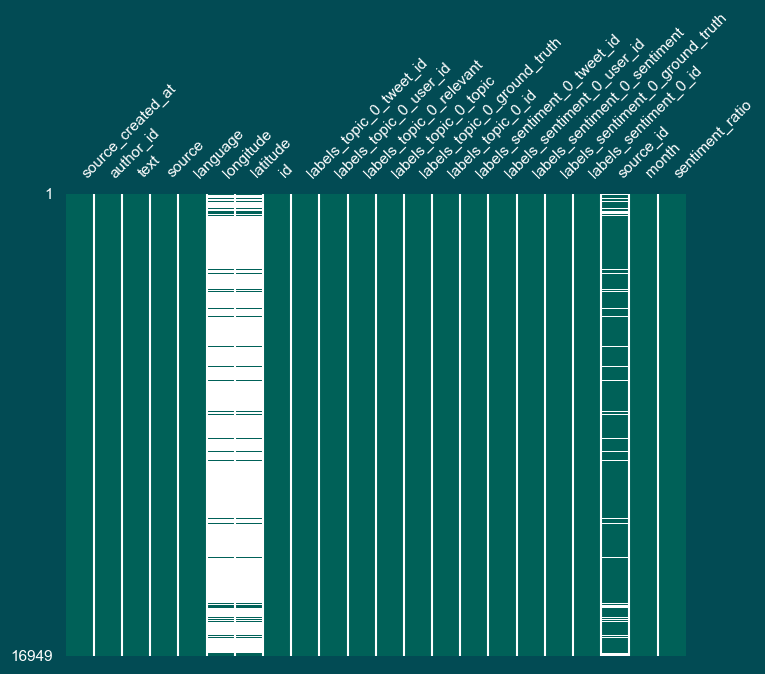

In [62]:
import missingno as msno
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a missing value matrix without displaying it
msno.matrix(df, ax=ax, color=(0, 0.3804, 0.3490), sparkline=False)

# Modify the bar patches to change the background color
for i, bar in enumerate(ax.patches):
    if i % 2 == 0:
        bar.set_facecolor('#006159')
    else:
        bar.set_facecolor('#024B54')

# Set the background color of the plot
fig.patch.set_facecolor('#024B54')
ax.set_facecolor('#024B54')

# Change label colors and size
ax.tick_params(axis='both', colors='white', labelsize=11)

plt.show()


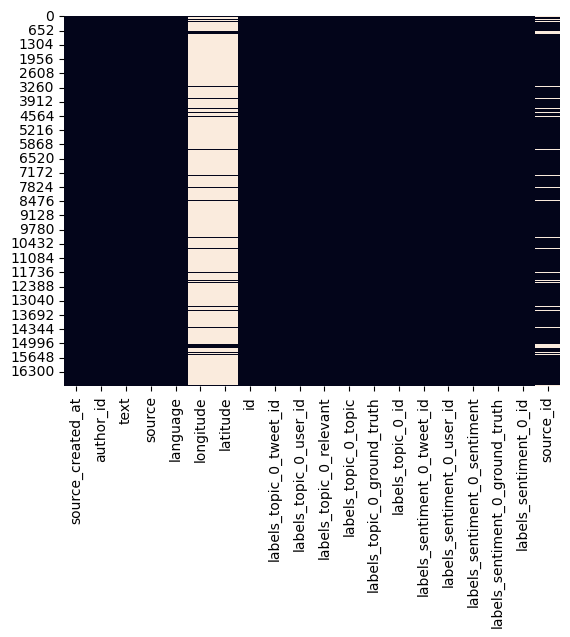

In [27]:
# Create a heatmap of missing values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [ ]:
df.isnull().sum()

source_created_at                      0
author_id                              0
text                                   0
source                                 0
language                               0
longitude                          15524
latitude                           15524
id                                     0
labels_topic_0_tweet_id                0
labels_topic_0_user_id                 0
labels_topic_0_relevant                0
labels_topic_0_topic                   0
labels_topic_0_ground_truth            0
labels_topic_0_id                      0
labels_sentiment_0_tweet_id            0
labels_sentiment_0_user_id             0
labels_sentiment_0_sentiment           0
labels_sentiment_0_ground_truth        0
labels_sentiment_0_id                  0
source_id                           1401
dtype: int64

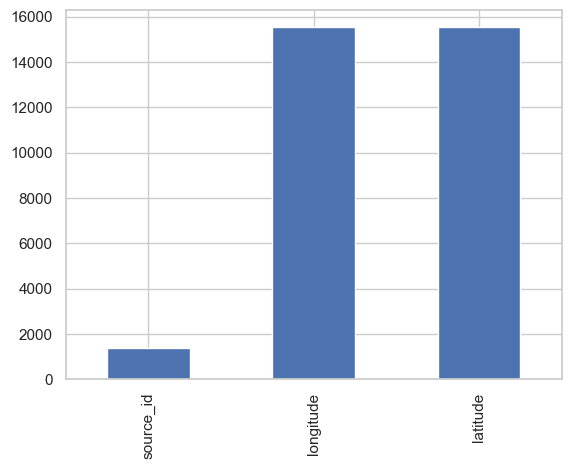

In [ ]:
#Create a barplot of missing values by using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.bar()
plt.show()


IT IS SEEN THAT LONGITUDE AND LATITUDE COLUMNS CANNOT BE USED. ALSO SOURCE_ID COLUMN'S MISSING DATA SHOULD BE EVALUATED

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MehmetCemAkuras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


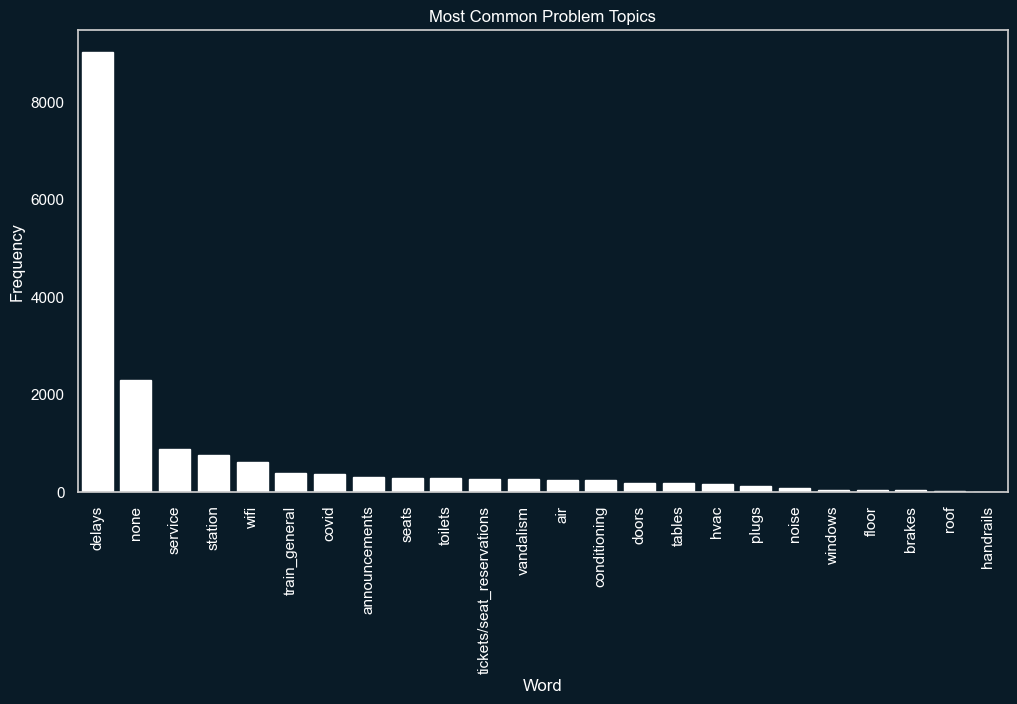

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Preprocess the data
nltk.download('stopwords')
stop = stopwords.words('english')
df['labels_topic_0_topic'] = df['labels_topic_0_topic'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Count most common words
most_common_words = Counter(" ".join(df['labels_topic_0_topic']).split()).most_common()
most_common_words = pd.DataFrame(most_common_words)
most_common_words.columns = ['word', 'frequency']

# Define colors to match the second graph
colors = ['#091B27']

# Create bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='word', y='frequency', data=most_common_words, palette=colors)
plt.xticks(rotation=90, color='white')
plt.yticks(color='white')
plt.xlabel('Word', color='white')
plt.ylabel('Frequency', color='white')
plt.title('Most Common Problem Topics', color='white')

# Set background color
fig = plt.gcf()
fig.set_facecolor('#091B27')

# Set grid color to #091B27
ax.yaxis.grid(color='#091B27')  # Set y-axis grid color
ax.xaxis.grid(color='#091B27')  # Set x-axis grid color

# Set axes background color to #091B27
ax.set_facecolor('#091B27')

# Set bar colors to white
for bar in ax.patches:
    bar.set_facecolor('white')

# Set color of x-axis tick labels to #091B27
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.show()


<Axes: >

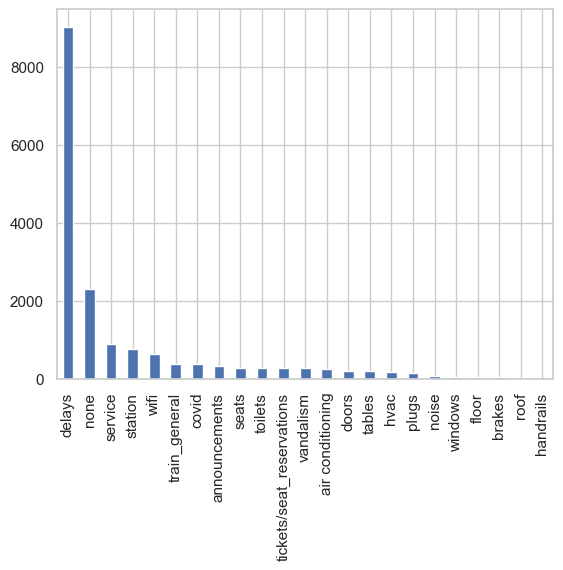

In [ ]:
df["labels_topic_0_topic"].value_counts().plot.bar()

In [ ]:
#Find the how many row are named as "delays"in labels_topic_0_topic column
df["labels_topic_0_topic"].value_counts().head(1)
print(df["labels_topic_0_topic"].value_counts().head(1))
#Find the ratio of "delays" in labels_topic_0_topic column
df["labels_topic_0_topic"].value_counts(normalize=True).head(1)
print(df["labels_topic_0_topic"].value_counts(normalize=True).head(1))

delays    9023
Name: labels_topic_0_topic, dtype: int64
delays    0.532362
Name: labels_topic_0_topic, dtype: float64


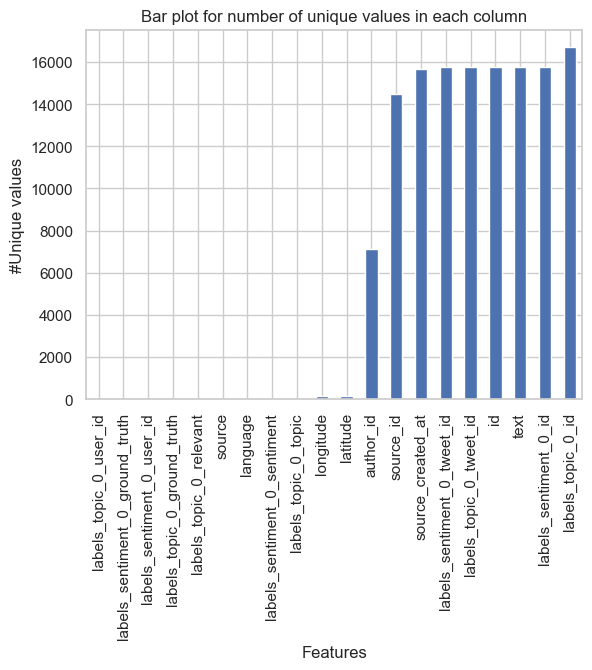

In [28]:
#Create a bar plot for number of unique values in each column
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
unique_values = df.nunique()
unique_values.sort_values(inplace=True)
unique_values.plot.bar()
plt.title('Bar plot for number of unique values in each column')
plt.ylabel('#Unique values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

**TOPIC: IS DATA REPRESENTATIVE**

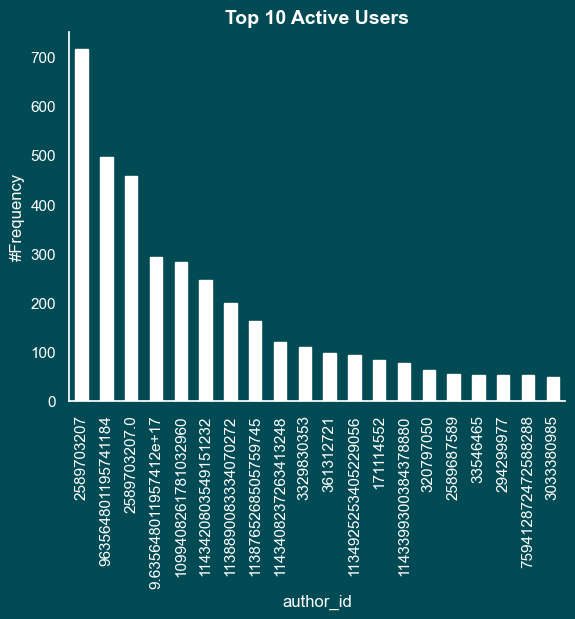

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate some data for demonstration purposes
# Replace this with your actual data
# top_20_users = df['author_id'].value_counts().head(20)

# Create a bar plot
top_20_users.plot.bar(color='white')  # Set bar colors to white

plt.title('Top 10 Active Users', color='white', fontsize=14, fontweight='bold')
plt.ylabel('#Frequency', color='white', fontsize=12)
plt.xlabel('author_id', color='white', fontsize=12)
plt.xticks(rotation=90, color='white')  # Set x tick color to white
plt.yticks(color='white')  # Set y tick color to white

# Set background color
fig = plt.gcf()
fig.set_facecolor('#024B54')

# Access the current Axes
ax = plt.gca()

# Set grid color to #024B54
ax.yaxis.grid(color='#024B54')  # Set y-axis grid color
ax.xaxis.grid(color='#024B54')  # Set x-axis grid color

# Set axes background color to #024B54
ax.set_facecolor('#024B54')

# Remove frame but keep axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')  # Set left spine color to white
ax.spines['bottom'].set_color('white')  # Set bottom spine color to white

plt.show()


In [94]:
#Make a list of top 20 users based on frequency of author_id
top_20_users = df['author_id'].value_counts().head(20)
top_20_users

2589703207               715
963564801195741184       496
2589703207.0             458
9.635648011957412e+17    294
1099408261781032960      283
1143420803549151232      247
1138890083334070272      199
1138765268505759745      163
1143408237263413248      120
3329830353               110
361312721                99 
1134925253405229056      94 
171114552                83 
1143399300384378880      77 
320797050                64 
2589687589               56 
33546465                 53 
294299977                53 
759412872472588288       53 
3033380985               49 
Name: author_id, dtype: int64

In [100]:
#Find top 10 author_id used Update word most frequently
df[df['text'].str.contains('Update')]['author_id'].value_counts().head(10)

2589703207               654
963564801195741184       496
2589703207.0             429
9.635648011957412e+17    294
1099408261781032960      49 
171114552                24 
171114552.0              17 
163816182                15 
9.696464157932787e+17    8  
2589687589.0             8  
Name: author_id, dtype: int64

In [44]:
#Show in which rows the most active user wrote tweets
df[df['author_id'] == '3329830353']

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels_topic_0_tweet_id,labels_topic_0_user_id,labels_topic_0_relevant,labels_topic_0_topic,labels_topic_0_ground_truth,labels_topic_0_id,labels_sentiment_0_tweet_id,labels_sentiment_0_user_id,labels_sentiment_0_sentiment,labels_sentiment_0_ground_truth,labels_sentiment_0_id,source_id
2970,2020-01-25 19:49:47,3329830353,@EE_Reminder @TLRailUK @networkrail It might b...,brandwatch,en,NaN,NaN,8cc6c490-d5ef-2b7f-7105-15b16db7ecc0,8cc6c490-d5ef-2b7f-7105-15b16db7ecc0,Z003XDCS,True,delays,True,2a4058d1-1a75-5509-973d-7396f74df485,8cc6c490-d5ef-2b7f-7105-15b16db7ecc0,Z003XDCS,neutral,True,2fe4738e-8db5-3e45-194c-3d4ea6405726,1221158241947856896
2989,2019-11-28 09:26:03,3329830353,@EdBowd @TLRailUK @networkrail You don’t know ...,brandwatch,en,NaN,NaN,b43e66e3-d7a1-c16c-ecab-e1db0e051bb5,b43e66e3-d7a1-c16c-ecab-e1db0e051bb5,Z003XDCS,True,delays,True,7efd67df-6aa6-9c80-0819-bbd799928d34,b43e66e3-d7a1-c16c-ecab-e1db0e051bb5,Z003XDCS,negative,True,20c96843-d5bf-279b-5eb5-7110e3cae24e,1199982779615891456
3134,2019-06-08 17:18:09,3329830353,"@GNRailUK Oh I will, just happy I managed to c...",brandwatch,en,NaN,NaN,a72ee41d-3f82-56da-5c16-c62e0e6f5d12,a72ee41d-3f82-56da-5c16-c62e0e6f5d12,Z003XDCS,True,vandalism,True,1b17eb5d-2af1-ba70-34d4-4f37ac56ac47,a72ee41d-3f82-56da-5c16-c62e0e6f5d12,Z003XDCS,neutral,True,de591698-4641-5b23-bdc0-ac58e0905d22,1137408484163686400
4647,2019-11-05 08:42:58,3329830353,@TLRailUK 700013 been on this set two days run...,brandwatch,en,NaN,NaN,f7139bd8-4615-2329-2eef-df7ec7c75612,f7139bd8-4615-2329-2eef-df7ec7c75612,Z003XDCS,True,vandalism,True,b1f83452-f7b1-c5e4-a6d6-30a8c8b3cbde,f7139bd8-4615-2329-2eef-df7ec7c75612,Z003XDCS,negative,True,c56d61c9-7a91-313d-9297-6d0c9da2c875,1191637014996815874
4648,2019-11-05 08:42:58,3329830353,@TLRailUK 700013 been on this set two days run...,brandwatch,en,NaN,NaN,f7139bd8-4615-2329-2eef-df7ec7c75612,f7139bd8-4615-2329-2eef-df7ec7c75612,Z003XDCS,True,toilets,True,c53d2327-25c4-44c9-3c4f-4c88f50a3204,f7139bd8-4615-2329-2eef-df7ec7c75612,Z003XDCS,negative,True,c56d61c9-7a91-313d-9297-6d0c9da2c875,1191637014996815874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16194,2020-02-18 09:05:32,3329830353,@dankell @TLRailUK @LDNLutonAirport 🙄 If the d...,brandwatch,en,NaN,NaN,81b56c45-0be1-7c60-ac23-6e29191cb7f4,81b56c45-0be1-7c60-ac23-6e29191cb7f4,Z003XDCS,True,none,True,ab25eff6-5ee9-4f8b-3d59-eac367c45882,81b56c45-0be1-7c60-ac23-6e29191cb7f4,Z003XDCS,negative,True,acc351fc-2f92-922f-a4ae-543006787ada,1229693420576346112
16312,2019-11-10 12:08:19,3329830353,Afternoon @TLRailUK Just so you’re aware 70004...,brandwatch,en,NaN,NaN,bc21f582-15e9-e5c7-48d3-15640ff08ba1,bc21f582-15e9-e5c7-48d3-15640ff08ba1,Z003XDCS,True,toilets,True,ee20c692-9160-e79d-2df2-f062d85caafb,bc21f582-15e9-e5c7-48d3-15640ff08ba1,Z003XDCS,neutral,True,00d6e282-2017-eeda-4465-bfd92f33a7a6,1193500631790739456
16629,2019-11-07 09:44:21,3329830353,Morning @TLRailUK 700035 onboard CIS screens d...,brandwatch,en,NaN,NaN,b71b4c7a-1fb2-146c-7094-dd58a1018078,b71b4c7a-1fb2-146c-7094-dd58a1018078,Z003XDCS,True,announcements,True,9b812f98-6aaa-eb25-0db9-6f0bd30994dd,b71b4c7a-1fb2-146c-7094-dd58a1018078,Z003XDCS,neutral,True,feb74a86-6df4-2f9b-f6fc-59930efa3f68,1192377236780916737
16632,2019-11-08 08:45:52,3329830353,Morning @TLRailUK think you have a software bu...,brandwatch,en,NaN,NaN,ed5ccb9b-54e0-acfd-5798-bcfb1aefd82e,ed5ccb9b-54e0-acfd-5798-bcfb1aefd82e,Z003XDCS,True,announcements,True,ab4d221c-1a9e-33f8-8a5b-876996710158,ed5ccb9b-54e0-acfd-5798-bcfb1aefd82e,Z003XDCS,neutral,True,3ff71530-6cd2-e717-0f97-37df6a79663c,1192724907144208384


In [43]:
#Show in which rows the most active user wrote tweets
df[df['author_id'] == '1143408237263413248']

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels_topic_0_tweet_id,labels_topic_0_user_id,labels_topic_0_relevant,labels_topic_0_topic,labels_topic_0_ground_truth,labels_topic_0_id,labels_sentiment_0_tweet_id,labels_sentiment_0_user_id,labels_sentiment_0_sentiment,labels_sentiment_0_ground_truth,labels_sentiment_0_id,source_id
1543,2019-08-31 23:40:03,1143408237263413248,0023 Thameslink train to Letchworth Garden Cit...,brandwatch,en-GB,NaN,NaN,81c35bd4-fe55-bc13-3f48-f089a7454843,81c35bd4-fe55-bc13-3f48-f089a7454843,Z003XDCS,True,delays,True,df05c8d3-5da9-ff16-7d46-a61b97758653,81c35bd4-fe55-bc13-3f48-f089a7454843,Z003XDCS,negative,True,068bcc26-a86e-ffa8-db29-78f53063fd71,1167945172451123203
1552,2019-08-31 23:55:02,1143408237263413248,0105 Thameslink train to Letchworth Garden Cit...,brandwatch,en-GB,NaN,NaN,200f1e5f-2007-b57b-2906-5a54476e5588,200f1e5f-2007-b57b-2906-5a54476e5588,Z003XDCS,True,delays,True,1171b5c3-14de-9b35-d4bf-e4f0e3d65c97,200f1e5f-2007-b57b-2906-5a54476e5588,Z003XDCS,negative,True,03b2ee1c-4ebd-20b9-abec-0eb3e4d54ed8,1167948946490019841
1553,2019-08-31 23:50:02,1143408237263413248,0105 Thameslink train to Letchworth Garden Cit...,brandwatch,en-GB,NaN,NaN,54867287-923a-061f-150e-80680dedd375,54867287-923a-061f-150e-80680dedd375,Z003XDCS,True,delays,True,237c6bb5-7c65-02a2-c30f-8a1299b2e32c,54867287-923a-061f-150e-80680dedd375,Z003XDCS,negative,True,11139e0c-4d5e-eb53-a925-3b615f30f36a,1167947688106610688
1594,2019-10-30 06:50:03,1143408237263413248,0651 Thameslink train to Cambridge North: On t...,brandwatch,en-GB,NaN,NaN,2c046e69-cd4a-0809-7dc4-9fa886092060,2c046e69-cd4a-0809-7dc4-9fa886092060,Z003XDCS,True,delays,True,0c13f034-1561-327b-7743-c51b3131915b,2c046e69-cd4a-0809-7dc4-9fa886092060,Z003XDCS,neutral,True,925c3ca1-813b-487e-b84f-19ef0ac72e61,1189434272991592448
1614,2019-08-28 06:35:07,1143408237263413248,0733 LNER train to Leeds: On time 0736 Thamesl...,brandwatch,en-GB,NaN,NaN,56fc08c7-cfa3-7148-5093-695203a64b67,56fc08c7-cfa3-7148-5093-695203a64b67,Z003XDCS,True,delays,True,802cdf20-5088-8525-0894-ec304b948417,56fc08c7-cfa3-7148-5093-695203a64b67,Z003XDCS,negative,True,0bfaab5a-f650-b514-1fd5-c2a9b061ba6c,1166600075906297856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,2019-09-28 21:12:03,1143408237263413248,2200 LNER train to Leeds: Delayed 2212 Great N...,brandwatch,en-GB,NaN,NaN,6a0fc7cb-7f25-47ff-6b54-2d7b2c813170,6a0fc7cb-7f25-47ff-6b54-2d7b2c813170,Z003XDCS,True,delays,True,cd9fd1bb-e309-e168-61d1-d2f4e3b1500f,6a0fc7cb-7f25-47ff-6b54-2d7b2c813170,Z003XDCS,neutral,True,1fb9e72a-6808-54b2-6e0e-22fee5dc3a55,1178054786983305223
2437,2019-09-28 21:15:02,1143408237263413248,2200 LNER train to Leeds: Delayed 2216 Thamesl...,brandwatch,en-GB,NaN,NaN,8020d0f8-319d-6479-f422-5d76d515ee69,8020d0f8-319d-6479-f422-5d76d515ee69,Z003XDCS,True,delays,True,e67626c9-4402-f72b-a1f6-47a9f0deebe8,8020d0f8-319d-6479-f422-5d76d515ee69,Z003XDCS,neutral,True,612dff7b-043d-623d-da8f-f28eca402aac,1178055541450579969
2438,2019-09-28 21:18:03,1143408237263413248,2200 LNER train to Leeds: Delayed 2228 Thamesl...,brandwatch,en-GB,NaN,NaN,1fc8310c-0798-e42a-36a8-3500cc7499dd,1fc8310c-0798-e42a-36a8-3500cc7499dd,Z003XDCS,True,delays,True,70680687-155d-990f-bc0f-d7fcd9f7ed9e,1fc8310c-0798-e42a-36a8-3500cc7499dd,Z003XDCS,neutral,True,dcbd1cf9-6b2d-26ba-d7d7-0569eaf9c73c,1178056296697913345
2440,2019-09-29 21:15:02,1143408237263413248,2205 LNER train to York: Delayed - plat 1 2235...,brandwatch,en-GB,NaN,NaN,7dc94a85-47ba-dee3-f6e2-651754760ec9,7dc94a85-47ba-dee3-f6e2-651754760ec9,Z003XDCS,True,delays,True,305cc9d3-75c9-8e4b-6b4e-e0b199830b77,7dc94a85-47ba-dee3-f6e2-651754760ec9,Z003XDCS,neutral,True,50f08161-1796-1741-d943-428f540781bd,1178417928691159040


In [41]:
#Show in which rows the most active user wrote tweets
df[df['author_id'] == '1138765268505759745']

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels_topic_0_tweet_id,labels_topic_0_user_id,labels_topic_0_relevant,labels_topic_0_topic,labels_topic_0_ground_truth,labels_topic_0_id,labels_sentiment_0_tweet_id,labels_sentiment_0_user_id,labels_sentiment_0_sentiment,labels_sentiment_0_ground_truth,labels_sentiment_0_id,source_id
1536,2019-08-29 23:15:06,1138765268505759745,0009 East Midlands Railway train to Derby via ...,brandwatch,en,NaN,NaN,ffe3e830-c020-dc71-6048-f58a665f858f,ffe3e830-c020-dc71-6048-f58a665f858f,Z003XDCS,True,delays,True,bf59805b-328f-1b89-a927-de7d169809a8,ffe3e830-c020-dc71-6048-f58a665f858f,Z003XDCS,negative,True,ed147e12-eb73-53ab-7a03-c5d39d1b348a,1167214120065732608
1537,2019-08-29 23:20:06,1138765268505759745,0009 East Midlands Railway train to Derby via ...,brandwatch,en,NaN,NaN,2320a94c-4691-84a5-80ae-0435a452eff4,2320a94c-4691-84a5-80ae-0435a452eff4,Z003XDCS,True,delays,True,97f97a15-5dc0-f735-a131-cd9dbf925246,2320a94c-4691-84a5-80ae-0435a452eff4,Z003XDCS,negative,True,00c98f53-a14c-e7c2-fb49-c56e086c3605,1167215376956035072
1540,2019-10-31 00:20:00,1138765268505759745,0015 Thameslink train to Three Bridges: Delaye...,brandwatch,en,NaN,NaN,b0fa36f6-f78f-76b7-20e5-4daad1d4a1dc,b0fa36f6-f78f-76b7-20e5-4daad1d4a1dc,Z003XDCS,True,delays,True,8fa4f36c-c0b8-3a07-30b9-0d4c50bc673d,b0fa36f6-f78f-76b7-20e5-4daad1d4a1dc,Z003XDCS,neutral,True,f78baf8b-5330-fbf3-0c21-a6fd946a3670,1189698498775650305
1541,2019-08-28 23:20:02,1138765268505759745,0015 Thameslink train to Three Bridges: Delaye...,brandwatch,en,NaN,NaN,609516bf-c81f-9480-b605-04c364c7ceff,609516bf-c81f-9480-b605-04c364c7ceff,Z003XDCS,True,delays,True,924f4b5c-f44f-1820-9c4e-70d49bce9a13,609516bf-c81f-9480-b605-04c364c7ceff,Z003XDCS,negative,True,49c1aaed-7062-9e8f-25d7-53be2202ae71,1166852974859231233
1554,2019-10-29 01:15:00,1138765268505759745,0115 Thameslink train to Three Bridges: Delaye...,brandwatch,en,NaN,NaN,1d7f7e27-26d2-a4f6-29c8-017574f5dea5,1d7f7e27-26d2-a4f6-29c8-017574f5dea5,Z003XDCS,True,delays,True,f293491a-c3b8-3b93-acc5-39b26a426ef4,1d7f7e27-26d2-a4f6-29c8-017574f5dea5,Z003XDCS,neutral,True,82266aef-4f5e-8967-8c64-f14e99bc2acd,1188987564163764224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,2019-09-28 21:51:00,1138765268505759745,2229 EMR train to Derby: expected 2252 - plat ...,brandwatch,en,NaN,NaN,ab49486f-7c32-5c56-1d68-5a9fa4051c35,ab49486f-7c32-5c56-1d68-5a9fa4051c35,Z003XDCS,True,delays,True,d077477c-d2dc-f8d5-a8a7-1f1e5dee1094,ab49486f-7c32-5c56-1d68-5a9fa4051c35,Z003XDCS,neutral,True,02189bf4-ce7b-d8e3-6a6c-5a86c0607c8d,1178064590090985472
2473,2019-09-28 22:12:00,1138765268505759745,2305 Thameslink train to Three Bridges: Delaye...,brandwatch,en,NaN,NaN,54327da3-12f2-5a8f-9a2d-42b10bd7c515,54327da3-12f2-5a8f-9a2d-42b10bd7c515,Z003XDCS,True,delays,True,2748deb6-e165-7b76-6d2e-3ee37b792cae,54327da3-12f2-5a8f-9a2d-42b10bd7c515,Z003XDCS,neutral,True,d2de97ff-729b-adbd-d848-dac2f04bda52,1178069875870355456
2474,2019-08-28 22:15:02,1138765268505759745,2305 Thameslink train to Three Bridges: Delaye...,brandwatch,en,NaN,NaN,98462063-f207-b0fb-2a9a-78ba8f0fb40a,98462063-f207-b0fb-2a9a-78ba8f0fb40a,Z003XDCS,True,delays,True,d748320f-76d1-e462-20b7-b3e4cb94418f,98462063-f207-b0fb-2a9a-78ba8f0fb40a,Z003XDCS,negative,True,9c2fe1d1-c764-ecd0-2817-d122f518620b,1166836617216241664
2482,2019-09-28 22:42:00,1138765268505759745,2335 Thameslink train to Brighton: Delayed,brandwatch,en,NaN,NaN,d523bdc6-bf1d-b8cb-d187-cf7e9cd21a09,d523bdc6-bf1d-b8cb-d187-cf7e9cd21a09,Z003XDCS,True,delays,True,77a5d5af-1b35-4283-9c1e-85cb17e31e3b,d523bdc6-bf1d-b8cb-d187-cf7e9cd21a09,Z003XDCS,neutral,True,01bc6e5a-d928-a220-6b59-43ab8407d602,1178077426062110723


In [40]:
#Show in which rows the most active user wrote tweets
df[df['author_id'] == '1138890083334070272']

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels_topic_0_tweet_id,labels_topic_0_user_id,labels_topic_0_relevant,labels_topic_0_topic,labels_topic_0_ground_truth,labels_topic_0_id,labels_sentiment_0_tweet_id,labels_sentiment_0_user_id,labels_sentiment_0_sentiment,labels_sentiment_0_ground_truth,labels_sentiment_0_id,source_id
1535,2019-09-28 22:54:06,1138890083334070272,0003 Thameslink train to Cambridge: On time - ...,brandwatch,en-GB,NaN,NaN,994d2836-6c1f-99b7-6d4a-7c64deaecdf0,994d2836-6c1f-99b7-6d4a-7c64deaecdf0,Z003XDCS,True,delays,True,2f911a08-c399-4e36-cae2-7b7f5f101a3d,994d2836-6c1f-99b7-6d4a-7c64deaecdf0,Z003XDCS,neutral,True,23996e37-4a09-a239-a865-4dbc2cd4c0da,1178080469486899201
1539,2019-09-30 23:18:05,1138890083334070272,0014 Thameslink train to Peterborough: Delayed...,brandwatch,en-GB,NaN,NaN,359704d2-6c34-5aa4-f71c-83ee3c99df6f,359704d2-6c34-5aa4-f71c-83ee3c99df6f,Z003XDCS,True,delays,True,432a8c27-cd64-c1a7-6050-eff4d0b1aa0b,359704d2-6c34-5aa4-f71c-83ee3c99df6f,Z003XDCS,neutral,True,b8b99e02-5ff3-ab15-d356-844eae07d3f0,1178811283807834112
1546,2019-08-31 23:40:03,1138890083334070272,0040 Thameslink train to Cambridge: expected 0...,brandwatch,en-GB,NaN,NaN,a7cb1fb9-b566-f1ae-18ed-7b3da34d93a0,a7cb1fb9-b566-f1ae-18ed-7b3da34d93a0,Z003XDCS,True,delays,True,fdc4c9d7-8009-1805-7b30-266014ac8584,a7cb1fb9-b566-f1ae-18ed-7b3da34d93a0,Z003XDCS,negative,True,436fb3bd-d191-4930-bc59-693ab247eaa6,1167945173193506818
1549,2019-08-31 23:55:03,1138890083334070272,0054 Great Northern train to Peterborough: On ...,brandwatch,en-GB,NaN,NaN,f4c796db-2d0c-d52d-0756-21f3c9839a36,f4c796db-2d0c-d52d-0756-21f3c9839a36,Z003XDCS,True,delays,True,7acf66e2-3c1b-8740-6f0d-7cd16b99cd43,f4c796db-2d0c-d52d-0756-21f3c9839a36,Z003XDCS,negative,True,5db72953-2ff0-e118-309b-99b7cc7981d0,1167948947609944064
1550,2019-08-30 23:50:03,1138890083334070272,0104 Great Northern train to Cambridge: On tim...,brandwatch,en-GB,NaN,NaN,b6cfbe7b-7660-b1aa-85bc-99590dad2337,b6cfbe7b-7660-b1aa-85bc-99590dad2337,Z003XDCS,True,delays,True,da893fe3-40cf-bd3e-91b4-9fc712b5494f,b6cfbe7b-7660-b1aa-85bc-99590dad2337,Z003XDCS,negative,True,f4e5e06b-8b51-4974-bf67-1204b1a5e180,1167585302577319938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429,2019-08-31 21:00:07,1138890083334070272,2155 Great Northern train to Moorgate via Hert...,brandwatch,en-GB,NaN,NaN,fc990aea-1dae-1a98-640a-3d1bfd49c291,fc990aea-1dae-1a98-640a-3d1bfd49c291,Z003XDCS,True,delays,True,46238566-da2f-b228-ad26-9d3135633420,fc990aea-1dae-1a98-640a-3d1bfd49c291,Z003XDCS,negative,True,e0ac0c38-a0d8-97d5-d101-7ce5c43e964e,1167904924614574080
2430,2019-08-31 21:05:08,1138890083334070272,2155 Great Northern train to Moorgate via Hert...,brandwatch,en-GB,NaN,NaN,9f348123-7339-8f60-5a44-f320f40d658f,9f348123-7339-8f60-5a44-f320f40d658f,Z003XDCS,True,delays,True,77837699-e81d-3934-120e-693a3ddeaf12,9f348123-7339-8f60-5a44-f320f40d658f,Z003XDCS,negative,True,ae70b320-bd48-c962-6e26-55c57486af0d,1167906186772959239
2463,2019-09-29 21:48:06,1138890083334070272,2239 Thameslink train to Peterborough: Delayed...,brandwatch,en-GB,NaN,NaN,3be76785-bc8b-1c25-8777-c07e8e1a3540,3be76785-bc8b-1c25-8777-c07e8e1a3540,Z003XDCS,True,delays,True,b13461b6-67a0-08c9-e192-c66def0b4f4c,3be76785-bc8b-1c25-8777-c07e8e1a3540,Z003XDCS,neutral,True,2b2682ba-1180-9727-0406-418cab253ed7,1178426247807950848
2471,2019-08-31 22:00:07,1138890083334070272,2303 Thameslink train to Cambridge: Delayed - ...,brandwatch,en-GB,NaN,NaN,2596339a-bac9-06f3-4916-71ac042ae628,2596339a-bac9-06f3-4916-71ac042ae628,Z003XDCS,True,delays,True,16f84d86-b1b1-e2d1-4162-b9f21d8ae927,2596339a-bac9-06f3-4916-71ac042ae628,Z003XDCS,negative,True,b9f54724-7d65-bf83-d225-e986bf802d3d,1167920022922022923


In [39]:
#Show in which rows the most active user wrote tweets
df[df['author_id'] == '1138890083334070272']

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels_topic_0_tweet_id,labels_topic_0_user_id,labels_topic_0_relevant,labels_topic_0_topic,labels_topic_0_ground_truth,labels_topic_0_id,labels_sentiment_0_tweet_id,labels_sentiment_0_user_id,labels_sentiment_0_sentiment,labels_sentiment_0_ground_truth,labels_sentiment_0_id,source_id
1535,2019-09-28 22:54:06,1138890083334070272,0003 Thameslink train to Cambridge: On time - ...,brandwatch,en-GB,NaN,NaN,994d2836-6c1f-99b7-6d4a-7c64deaecdf0,994d2836-6c1f-99b7-6d4a-7c64deaecdf0,Z003XDCS,True,delays,True,2f911a08-c399-4e36-cae2-7b7f5f101a3d,994d2836-6c1f-99b7-6d4a-7c64deaecdf0,Z003XDCS,neutral,True,23996e37-4a09-a239-a865-4dbc2cd4c0da,1178080469486899201
1539,2019-09-30 23:18:05,1138890083334070272,0014 Thameslink train to Peterborough: Delayed...,brandwatch,en-GB,NaN,NaN,359704d2-6c34-5aa4-f71c-83ee3c99df6f,359704d2-6c34-5aa4-f71c-83ee3c99df6f,Z003XDCS,True,delays,True,432a8c27-cd64-c1a7-6050-eff4d0b1aa0b,359704d2-6c34-5aa4-f71c-83ee3c99df6f,Z003XDCS,neutral,True,b8b99e02-5ff3-ab15-d356-844eae07d3f0,1178811283807834112
1546,2019-08-31 23:40:03,1138890083334070272,0040 Thameslink train to Cambridge: expected 0...,brandwatch,en-GB,NaN,NaN,a7cb1fb9-b566-f1ae-18ed-7b3da34d93a0,a7cb1fb9-b566-f1ae-18ed-7b3da34d93a0,Z003XDCS,True,delays,True,fdc4c9d7-8009-1805-7b30-266014ac8584,a7cb1fb9-b566-f1ae-18ed-7b3da34d93a0,Z003XDCS,negative,True,436fb3bd-d191-4930-bc59-693ab247eaa6,1167945173193506818
1549,2019-08-31 23:55:03,1138890083334070272,0054 Great Northern train to Peterborough: On ...,brandwatch,en-GB,NaN,NaN,f4c796db-2d0c-d52d-0756-21f3c9839a36,f4c796db-2d0c-d52d-0756-21f3c9839a36,Z003XDCS,True,delays,True,7acf66e2-3c1b-8740-6f0d-7cd16b99cd43,f4c796db-2d0c-d52d-0756-21f3c9839a36,Z003XDCS,negative,True,5db72953-2ff0-e118-309b-99b7cc7981d0,1167948947609944064
1550,2019-08-30 23:50:03,1138890083334070272,0104 Great Northern train to Cambridge: On tim...,brandwatch,en-GB,NaN,NaN,b6cfbe7b-7660-b1aa-85bc-99590dad2337,b6cfbe7b-7660-b1aa-85bc-99590dad2337,Z003XDCS,True,delays,True,da893fe3-40cf-bd3e-91b4-9fc712b5494f,b6cfbe7b-7660-b1aa-85bc-99590dad2337,Z003XDCS,negative,True,f4e5e06b-8b51-4974-bf67-1204b1a5e180,1167585302577319938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429,2019-08-31 21:00:07,1138890083334070272,2155 Great Northern train to Moorgate via Hert...,brandwatch,en-GB,NaN,NaN,fc990aea-1dae-1a98-640a-3d1bfd49c291,fc990aea-1dae-1a98-640a-3d1bfd49c291,Z003XDCS,True,delays,True,46238566-da2f-b228-ad26-9d3135633420,fc990aea-1dae-1a98-640a-3d1bfd49c291,Z003XDCS,negative,True,e0ac0c38-a0d8-97d5-d101-7ce5c43e964e,1167904924614574080
2430,2019-08-31 21:05:08,1138890083334070272,2155 Great Northern train to Moorgate via Hert...,brandwatch,en-GB,NaN,NaN,9f348123-7339-8f60-5a44-f320f40d658f,9f348123-7339-8f60-5a44-f320f40d658f,Z003XDCS,True,delays,True,77837699-e81d-3934-120e-693a3ddeaf12,9f348123-7339-8f60-5a44-f320f40d658f,Z003XDCS,negative,True,ae70b320-bd48-c962-6e26-55c57486af0d,1167906186772959239
2463,2019-09-29 21:48:06,1138890083334070272,2239 Thameslink train to Peterborough: Delayed...,brandwatch,en-GB,NaN,NaN,3be76785-bc8b-1c25-8777-c07e8e1a3540,3be76785-bc8b-1c25-8777-c07e8e1a3540,Z003XDCS,True,delays,True,b13461b6-67a0-08c9-e192-c66def0b4f4c,3be76785-bc8b-1c25-8777-c07e8e1a3540,Z003XDCS,neutral,True,2b2682ba-1180-9727-0406-418cab253ed7,1178426247807950848
2471,2019-08-31 22:00:07,1138890083334070272,2303 Thameslink train to Cambridge: Delayed - ...,brandwatch,en-GB,NaN,NaN,2596339a-bac9-06f3-4916-71ac042ae628,2596339a-bac9-06f3-4916-71ac042ae628,Z003XDCS,True,delays,True,16f84d86-b1b1-e2d1-4162-b9f21d8ae927,2596339a-bac9-06f3-4916-71ac042ae628,Z003XDCS,negative,True,b9f54724-7d65-bf83-d225-e986bf802d3d,1167920022922022923


In [38]:
#Show in which rows the most active user wrote tweets
df[df['author_id'] == '1138890083334070272']

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels_topic_0_tweet_id,labels_topic_0_user_id,labels_topic_0_relevant,labels_topic_0_topic,labels_topic_0_ground_truth,labels_topic_0_id,labels_sentiment_0_tweet_id,labels_sentiment_0_user_id,labels_sentiment_0_sentiment,labels_sentiment_0_ground_truth,labels_sentiment_0_id,source_id
1535,2019-09-28 22:54:06,1138890083334070272,0003 Thameslink train to Cambridge: On time - ...,brandwatch,en-GB,NaN,NaN,994d2836-6c1f-99b7-6d4a-7c64deaecdf0,994d2836-6c1f-99b7-6d4a-7c64deaecdf0,Z003XDCS,True,delays,True,2f911a08-c399-4e36-cae2-7b7f5f101a3d,994d2836-6c1f-99b7-6d4a-7c64deaecdf0,Z003XDCS,neutral,True,23996e37-4a09-a239-a865-4dbc2cd4c0da,1178080469486899201
1539,2019-09-30 23:18:05,1138890083334070272,0014 Thameslink train to Peterborough: Delayed...,brandwatch,en-GB,NaN,NaN,359704d2-6c34-5aa4-f71c-83ee3c99df6f,359704d2-6c34-5aa4-f71c-83ee3c99df6f,Z003XDCS,True,delays,True,432a8c27-cd64-c1a7-6050-eff4d0b1aa0b,359704d2-6c34-5aa4-f71c-83ee3c99df6f,Z003XDCS,neutral,True,b8b99e02-5ff3-ab15-d356-844eae07d3f0,1178811283807834112
1546,2019-08-31 23:40:03,1138890083334070272,0040 Thameslink train to Cambridge: expected 0...,brandwatch,en-GB,NaN,NaN,a7cb1fb9-b566-f1ae-18ed-7b3da34d93a0,a7cb1fb9-b566-f1ae-18ed-7b3da34d93a0,Z003XDCS,True,delays,True,fdc4c9d7-8009-1805-7b30-266014ac8584,a7cb1fb9-b566-f1ae-18ed-7b3da34d93a0,Z003XDCS,negative,True,436fb3bd-d191-4930-bc59-693ab247eaa6,1167945173193506818
1549,2019-08-31 23:55:03,1138890083334070272,0054 Great Northern train to Peterborough: On ...,brandwatch,en-GB,NaN,NaN,f4c796db-2d0c-d52d-0756-21f3c9839a36,f4c796db-2d0c-d52d-0756-21f3c9839a36,Z003XDCS,True,delays,True,7acf66e2-3c1b-8740-6f0d-7cd16b99cd43,f4c796db-2d0c-d52d-0756-21f3c9839a36,Z003XDCS,negative,True,5db72953-2ff0-e118-309b-99b7cc7981d0,1167948947609944064
1550,2019-08-30 23:50:03,1138890083334070272,0104 Great Northern train to Cambridge: On tim...,brandwatch,en-GB,NaN,NaN,b6cfbe7b-7660-b1aa-85bc-99590dad2337,b6cfbe7b-7660-b1aa-85bc-99590dad2337,Z003XDCS,True,delays,True,da893fe3-40cf-bd3e-91b4-9fc712b5494f,b6cfbe7b-7660-b1aa-85bc-99590dad2337,Z003XDCS,negative,True,f4e5e06b-8b51-4974-bf67-1204b1a5e180,1167585302577319938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429,2019-08-31 21:00:07,1138890083334070272,2155 Great Northern train to Moorgate via Hert...,brandwatch,en-GB,NaN,NaN,fc990aea-1dae-1a98-640a-3d1bfd49c291,fc990aea-1dae-1a98-640a-3d1bfd49c291,Z003XDCS,True,delays,True,46238566-da2f-b228-ad26-9d3135633420,fc990aea-1dae-1a98-640a-3d1bfd49c291,Z003XDCS,negative,True,e0ac0c38-a0d8-97d5-d101-7ce5c43e964e,1167904924614574080
2430,2019-08-31 21:05:08,1138890083334070272,2155 Great Northern train to Moorgate via Hert...,brandwatch,en-GB,NaN,NaN,9f348123-7339-8f60-5a44-f320f40d658f,9f348123-7339-8f60-5a44-f320f40d658f,Z003XDCS,True,delays,True,77837699-e81d-3934-120e-693a3ddeaf12,9f348123-7339-8f60-5a44-f320f40d658f,Z003XDCS,negative,True,ae70b320-bd48-c962-6e26-55c57486af0d,1167906186772959239
2463,2019-09-29 21:48:06,1138890083334070272,2239 Thameslink train to Peterborough: Delayed...,brandwatch,en-GB,NaN,NaN,3be76785-bc8b-1c25-8777-c07e8e1a3540,3be76785-bc8b-1c25-8777-c07e8e1a3540,Z003XDCS,True,delays,True,b13461b6-67a0-08c9-e192-c66def0b4f4c,3be76785-bc8b-1c25-8777-c07e8e1a3540,Z003XDCS,neutral,True,2b2682ba-1180-9727-0406-418cab253ed7,1178426247807950848
2471,2019-08-31 22:00:07,1138890083334070272,2303 Thameslink train to Cambridge: Delayed - ...,brandwatch,en-GB,NaN,NaN,2596339a-bac9-06f3-4916-71ac042ae628,2596339a-bac9-06f3-4916-71ac042ae628,Z003XDCS,True,delays,True,16f84d86-b1b1-e2d1-4162-b9f21d8ae927,2596339a-bac9-06f3-4916-71ac042ae628,Z003XDCS,negative,True,b9f54724-7d65-bf83-d225-e986bf802d3d,1167920022922022923


In [37]:
#Show in which rows the most active user wrote tweets
df[df['author_id'] == '1143420803549151232']

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels_topic_0_tweet_id,labels_topic_0_user_id,labels_topic_0_relevant,labels_topic_0_topic,labels_topic_0_ground_truth,labels_topic_0_id,labels_sentiment_0_tweet_id,labels_sentiment_0_user_id,labels_sentiment_0_sentiment,labels_sentiment_0_ground_truth,labels_sentiment_0_id,source_id
1538,2019-10-30 00:15:01,1143420803549151232,0011 Great Northern train to Welwyn Garden Cit...,brandwatch,en-GB,NaN,NaN,9555568b-ded6-d91b-1c9f-8831bdde43f8,9555568b-ded6-d91b-1c9f-8831bdde43f8,Z003XDCS,True,delays,True,041a2da0-a69e-abaf-7c03-cb564507aeab,9555568b-ded6-d91b-1c9f-8831bdde43f8,Z003XDCS,neutral,True,d551b749-5225-09f5-f3a8-74e781cc3578,1189334856997703680
1542,2019-10-30 00:20:01,1143420803549151232,0021 Great Northern train to Moorgate: On time...,brandwatch,en-GB,NaN,NaN,7e2db6c9-640e-d206-032d-3c884de51d54,7e2db6c9-640e-d206-032d-3c884de51d54,Z003XDCS,True,delays,True,a8b8b68c-1efe-1b0a-7fd5-6e9f70e52a98,7e2db6c9-640e-d206-032d-3c884de51d54,Z003XDCS,neutral,True,a120cee8-5c6c-10c9-43b4-b7349f651116,1189336115578314752
1544,2019-08-31 23:40:03,1143420803549151232,0029 Thameslink train to Letchworth Garden Cit...,brandwatch,en-GB,NaN,NaN,07fc34ee-4236-8bf0-20fb-27b4d0e2854a,07fc34ee-4236-8bf0-20fb-27b4d0e2854a,Z003XDCS,True,delays,True,df7d4918-78a1-58d3-f54b-74e384f05dc1,07fc34ee-4236-8bf0-20fb-27b4d0e2854a,Z003XDCS,negative,True,8c9cdc82-394f-f975-2983-cec9fa38e035,1167945175655682049
1548,2019-08-30 23:50:03,1143420803549151232,0051 Thameslink train to London Kings Cross: O...,brandwatch,en-GB,NaN,NaN,938d4d9b-91e9-6eba-f374-b7cd528dabfb,938d4d9b-91e9-6eba-f374-b7cd528dabfb,Z003XDCS,True,delays,True,aa479c2e-8bb7-1be7-4434-af4b35ff03e3,938d4d9b-91e9-6eba-f374-b7cd528dabfb,Z003XDCS,negative,True,22de2f1d-a81a-6755-c06b-8cc13085fffc,1167585303537889280
1568,2019-10-29 05:45:01,1143420803549151232,0541 Great Northern train to Moorgate: Delayed...,brandwatch,en-GB,NaN,NaN,a96fde00-597f-fb26-2dc3-29ac615bcc90,a96fde00-597f-fb26-2dc3-29ac615bcc90,Z003XDCS,True,delays,True,d638d9de-6d6c-19a0-3b90-064b06645c22,a96fde00-597f-fb26-2dc3-29ac615bcc90,Z003XDCS,neutral,True,f65ac54d-e026-605d-d1ee-d3226bd869a7,1189055517886423040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2019-08-31 21:50:07,1143420803549151232,2238 Thameslink train to London Kings Cross: e...,brandwatch,en-GB,NaN,NaN,2d4e1525-3ad4-80f8-664e-8a245dec57c2,2d4e1525-3ad4-80f8-664e-8a245dec57c2,Z003XDCS,True,delays,True,9f2a596c-5ce2-88bb-e3e5-654902e9be71,2d4e1525-3ad4-80f8-664e-8a245dec57c2,Z003XDCS,negative,True,fc32e0c0-163a-4678-76a8-c0f49012cfe3,1167917509019750400
2469,2019-08-29 22:10:09,1143420803549151232,2303 Great Northern train to Moorgate: Delayed...,brandwatch,en-GB,NaN,NaN,4dd4b0e7-21a7-907f-13a7-348e22e5fe89,4dd4b0e7-21a7-907f-13a7-348e22e5fe89,Z003XDCS,True,delays,True,d8975358-fef3-5610-d75a-f23fa314c804,4dd4b0e7-21a7-907f-13a7-348e22e5fe89,Z003XDCS,negative,True,b352bb73-b073-9a84-6b32-d69decc462f4,1167197773764210688
2470,2019-08-29 22:15:09,1143420803549151232,2303 Great Northern train to Moorgate: Delayed...,brandwatch,en-GB,NaN,NaN,15740755-0144-d47f-dc1d-79fbd600ad04,15740755-0144-d47f-dc1d-79fbd600ad04,Z003XDCS,True,delays,True,cea82293-6cfc-ba65-366e-cd59ed2478cb,15740755-0144-d47f-dc1d-79fbd600ad04,Z003XDCS,negative,True,39d9f60c-37cc-9253-82df-d4bf260eb6f7,1167199033888301056
2485,2019-09-29 22:45:00,1143420803549151232,2342 Great Northern train to Welwyn Garden Cit...,brandwatch,en-GB,NaN,NaN,ee2b7ecf-6295-ccd6-d23d-f3de57b1543c,ee2b7ecf-6295-ccd6-d23d-f3de57b1543c,Z003XDCS,True,delays,True,56da8df2-20c2-1df1-29d6-0fafc351a4eb,ee2b7ecf-6295-ccd6-d23d-f3de57b1543c,Z003XDCS,neutral,True,a5a0079d-12c4-1e0d-f95f-a6e4f3369c10,1178440569611309056


In [97]:
#Show in which rows the most active user wrote tweets
df[df['author_id'] == '1099408261781032960']

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels_topic_0_tweet_id,labels_topic_0_user_id,...,labels_topic_0_ground_truth,labels_topic_0_id,labels_sentiment_0_tweet_id,labels_sentiment_0_user_id,labels_sentiment_0_sentiment,labels_sentiment_0_ground_truth,labels_sentiment_0_id,source_id,month,sentiment_ratio
11879,2020-03-20 15:03:27,1099408261781032960,Coronavirus Cancellations: Govia Thameslink Railway announce revised timetable https://t.co/gAaEgftSY3,brandwatch,en-GB,NaN,NaN,a77aa93b-0905-6d44-fd5b-46198a3a94c1,a77aa93b-0905-6d44-fd5b-46198a3a94c1,Z003XDCS,...,True,6a50c78f-5514-d746-b970-369709056930,a77aa93b-0905-6d44-fd5b-46198a3a94c1,Z003XDCS,negative,True,753b3002-a325-4c4c-74de-a6fdf1f18082,1241017514789949440,2020-03,-1
13123,2020-03-20 08:09:07,1099408261781032960,Service Indicator Update: Thameslink is reporting Major delays on some routes,brandwatch,en-GB,NaN,NaN,d02450ad-5c1a-f685-2b97-14b00ca09b4f,d02450ad-5c1a-f685-2b97-14b00ca09b4f,Z003XDCS,...,True,aed2f796-49a8-477a-33d0-2e059af8e392,d02450ad-5c1a-f685-2b97-14b00ca09b4f,Z003XDCS,negative,True,941d9497-f7f2-f44c-f883-dcbc5001c2b8,1240913247185907712,2020-03,-1
13124,2020-03-20 08:09:07,1099408261781032960,Service Indicator Update: Thameslink is reporting Major delays on some routes,brandwatch,en-GB,NaN,NaN,d02450ad-5c1a-f685-2b97-14b00ca09b4f,d02450ad-5c1a-f685-2b97-14b00ca09b4f,Z003XDCS,...,True,aed2f796-49a8-477a-33d0-2e059af8e392,d02450ad-5c1a-f685-2b97-14b00ca09b4f,Z003XDCS,negative,True,941d9497-f7f2-f44c-f883-dcbc5001c2b8,1240913247185907712,2020-03,-1
13125,2020-03-20 08:09:07,1099408261781032960,Service Indicator Update: Thameslink is reporting Major delays on some routes,brandwatch,en-GB,NaN,NaN,d02450ad-5c1a-f685-2b97-14b00ca09b4f,d02450ad-5c1a-f685-2b97-14b00ca09b4f,Z003XDCS,...,True,aed2f796-49a8-477a-33d0-2e059af8e392,d02450ad-5c1a-f685-2b97-14b00ca09b4f,Z003XDCS,negative,True,941d9497-f7f2-f44c-f883-dcbc5001c2b8,1240913247185907712,2020-03,-1
13126,2020-02-29 00:12:06,1099408261781032960,Service Indicator Update: Thameslink is reporting Minor delays on some routes,brandwatch,en-GB,NaN,NaN,0eb20341-c1c2-66aa-1706-3c10a6e4661a,0eb20341-c1c2-66aa-1706-3c10a6e4661a,Z003XDCS,...,True,217e69aa-7faa-9a63-a64a-bf751613c98b,0eb20341-c1c2-66aa-1706-3c10a6e4661a,Z003XDCS,neutral,True,16fd55ad-53af-a13d-14eb-9fc48b300078,1233545444522942464,2020-02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13849,2020-02-25 06:30:01,1099408261781032960,Thanks to all Scotrail Thameslink and all other rail travellers who purchased the Train Beacon iOS app yesterday. Hope it is helping you deal with rail delays and cancelled services 😊,brandwatch,en-GB,NaN,NaN,989194bb-4c33-1fad-84c1-600ad84b6aa5,989194bb-4c33-1fad-84c1-600ad84b6aa5,Z003XDCS,...,True,399335fb-ac65-510d-f463-8ac520923383,989194bb-4c33-1fad-84c1-600ad84b6aa5,Z003XDCS,neutral,True,be4cf12b-0c41-be30-4802-74818006d71b,1232190997112770560,2020-02,0
13850,2020-02-26 13:10:58,1099408261781032960,"Thanks to all new followers of Train Beacon, Train Beacon is an iOS app which shows trains in augmented reality. Hopefully useful from Worthing to Stowmarket, Southend to Catford, Holyhead to Bangor Gwynedd. Useful for Thameslink and Scotrail delays and cancellations too. Diolch",brandwatch,en-GB,NaN,NaN,71665f7c-b5cb-4595-2911-50b370de904a,71665f7c-b5cb-4595-2911-50b370de904a,Z003XDCS,...,True,95ac6d7d-2529-2f1f-490d-833ce6dbb6b0,71665f7c-b5cb-4595-2911-50b370de904a,Z003XDCS,neutral,True,73f4ac0d-56a2-9c8c-7838-b1687c0eaf39,1232654286896664578,2020-02,0
14847,2020-02-24 16:10:12,1099408261781032960,⚠️ A points failure between West Hampstead Thameslink and Cricklewood means trains may be cancelled or delayed. ⚠️ #Cricklewood Grab the Train Beacon iOS app today https://t.co/YKJpsh5JFM https://t.co/EjTFutRg62,brandwatch,en-GB,NaN,NaN,58509f74-0081-362c-11b6-e8d303fa7ce1,58509f74-0081-362c-11b6-e8d303fa7ce1,Z003XDCS,...,True,f74f6e38-d16a-8598-fecb-4d5

In [78]:
#Find who wrote most tweets
df['author_id'].value_counts().idxmax()


'2589703207'

In [81]:
#Find top 10 author_id used #TLUpdates hashtag most
df[df['text'].str.contains('#TLUpdates')]['author_id'].value_counts().head(10)


2589703207                654
2589703207.0              428
745186633146732544        5  
9.696464157932787e+17     4  
9.949848573390889e+17     3  
2589687589                3  
1.1174226123831745e+18    2  
72557932                  2  
969646415793278978        2  
1085935240739282944       2  
Name: author_id, dtype: int64

In [96]:
#Find top 10 author_id used (Thameslink Update) word most
df[df['text'].str.contains('Thameslink Update')]['author_id'].value_counts().head(10)

963564801195741184       496
9.635648011957412e+17    294
Name: author_id, dtype: int64

In [95]:
#Show in which rows the most active user wrote tweets
df[df['author_id'] == '963564801195741184']

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels_topic_0_tweet_id,labels_topic_0_user_id,...,labels_topic_0_ground_truth,labels_topic_0_id,labels_sentiment_0_tweet_id,labels_sentiment_0_user_id,labels_sentiment_0_sentiment,labels_sentiment_0_ground_truth,labels_sentiment_0_id,source_id,month,sentiment_ratio
671,2020-08-08 04:14:01.939,963564801195741184,(Thameslink Update) 04:20 Luton to Sutton Surrey due 06:14 - 04:20 Luton to Sutton Surrey due 06:14 has been delayed at Luton and is now 6 minutes late.,sprinklr,en,-0.12574,51.50853,c7850569-2393-30b4-3157-fdf4a211834e,c7850569-2393-30b4-3157-fdf4a211834e,Z003XDCS,...,True,e79b0538-80ba-240b-caba-c43d04857600,c7850569-2393-30b4-3157-fdf4a211834e,Z003XDCS,negative,True,d49173bb-7b2f-3005-ca2b-aafa45e3d590,NaN,2020-08,-1
672,2020-08-06 04:14:05.740,963564801195741184,(Thameslink Update) 04:50 Luton to Sutton Surrey due 06:44 - 04:50 Luton to Sutton Surrey due 06:44 has been delayed at Luton and is now 7 minutes late.,sprinklr,en,-0.12574,51.50853,5df6a4ee-0b19-6a9c-ea59-623b8adb5bfb,5df6a4ee-0b19-6a9c-ea59-623b8adb5bfb,Z003XDCS,...,True,fe827f7b-c904-8d3b-7470-0c9e0a050f8f,5df6a4ee-0b19-6a9c-ea59-623b8adb5bfb,Z003XDCS,negative,True,0d5b7e41-5051-e255-99f7-278b1a809786,NaN,2020-08,-1
673,2020-07-22 04:14:02.496,963564801195741184,(Thameslink Update) 04:50 Luton to Sutton Surrey due 06:44 - 04:50 Luton to Sutton Surrey due 06:44 is being delayed at Luton.,sprinklr,en,-0.12574,51.50853,4f0edb8d-3769-46b8-11e9-c283ce147ed6,4f0edb8d-3769-46b8-11e9-c283ce147ed6,Z003XDCS,...,True,16182a2f-883d-b509-1554-91e1832194d8,4f0edb8d-3769-46b8-11e9-c283ce147ed6,Z003XDCS,negative,True,073aedbf-9c83-9653-b5cc-5c66e63b72fc,NaN,2020-07,-1
674,2020-08-06 06:14:22.612,963564801195741184,(Thameslink Update) 05:36 Luton to Sutton Surrey due 07:17 - 05:36 Luton to Sutton Surrey due 07:17 has been delayed between West Hampstead Thameslink and Kentish Town and is now 19 minutes late.,sprinklr,en,-0.12574,51.50853,84f905b6-f1c8-dd49-0ca8-84e99c8c4522,84f905b6-f1c8-dd49-0ca8-84e99c8c4522,Z003XDCS,...,True,8b507eba-2aa5-a724-66ce-2fa5f736c8b0,84f905b6-f1c8-dd49-0ca8-84e99c8c4522,Z003XDCS,negative,True,5b21b67b-c100-ec68-b30c-5bdcd23a0445,NaN,2020-08,-1
675,2020-08-16 05:14:09.687,963564801195741184,(Thameslink Update) 05:55 Bedford to Luton due 06:20 - 05:55 Bedford to Luton due 06:20 is being delayed at Bedford and is now expected to be 10 minutes late.,sprinklr,en,-0.12574,51.50853,7ed3aaa6-7563-81cf-a584-b91377b69dda,7ed3aaa6-7563-81cf-a584-b91377b69dda,Z003XDCS,...,True,c06c749d-f6c9-d7fc-bc3d-abcd27b2acef,7ed3aaa6-7563-81cf-a584-b91377b69dda,Z003XDCS,negative,True,302296a3-41c9-b24b-b2d9-17686fde1c15,NaN,2020-08,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2020-07-30 08:53:05.127,963564801195741184,(Thameslink Update) Delays to services between West Hampstead Thameslink and St Albans City - Due to a speed restriction over defective track between West Hampstead Thameslink and St Albans City trains have to run at reduced speed on some lines.,sprinklr,en,-0.12574,51.50853,df7f097a-d44d-f828-2881-c0a6a183ce67,df7f097a-d44d-f828-2881-c0a6a183ce67,Z003XDCS,...,True,32af64a1-6856-4023-7cea-a2de61454fc9,df7f097a-d44d-f828-2881-c0a6a183ce67,Z003XDCS,neutral,True,4af57546-46e2-a47f-209e-9090df1b6d39,NaN,2020-07,0
1455,2019-02-13 09:16:14.000,963564801195741184,(Thameslink Update) Delays to services between West Hampstead Thameslink and St Albans City - Due to a speed restriction over defective track between West Hampstead Thameslink and St Albans City:,brandwatch,en-GB,NaN,NaN,f6771929-0630-4ab6-892b-3c298f37f7a0,f6771929-0630-4ab6-892b-3c298f37f7a0,Z003XDCS,...,True,5947f0c2-0abe-36e9-1ea1-732dc8edff7c,f6771929-0630-4ab6-892b-3c298f37f7a0,Z003XDCS,negative,True,a6f4a289-0281-5b2a-a8ce-4a7e46efbbb8,1095612600610635776,2019-02,-1
1456,2019-02-21 06:36:22.000,963564801195741184,(Thameslink Update) Delays to services between West Hampst

In [21]:
#Group author_id by which has more than 50 tweets and list them
tweet_senders = df.groupby('author_id').filter(lambda x: len(x) > 50)['author_id'].unique()
print(tweet_senders)
#Check each tweet sender and labels_topic_0_topic by using a pivot table
df[df['author_id'].isin(tweet_senders)].pivot_table(index='author_id', columns='labels_topic_0_topic', values='text', aggfunc='count', fill_value=0)
#Check each tweet sender and labels_sentiment_0_sentiment by using a pivot table
df[df['author_id'].isin(tweet_senders)].pivot_table(index='author_id', columns='labels_sentiment_0_sentiment', values='text', aggfunc='count', fill_value=0)

['759412872472588288' '2589687589' '33546465' '361312721' '171114552'
 '2589703207' '2589703207.0' '963564801195741184' '9.635648011957412e+17'
 '1138890083334070272' '1138765268505759745' '1143420803549151232'
 '1143408237263413248' '1134925253405229056' '1143399300384378880'
 '320797050' '294299977' '3329830353' '1099408261781032960']


labels_sentiment_0_sentiment,negative,neutral,positive
author_id,,,
1099408261781032960,118,165,0
1134925253405229056,32,62,0
1138765268505759745,44,119,0
1138890083334070272,79,120,0
1143399300384378880,24,53,0
1143408237263413248,44,76,0
1143420803549151232,73,174,0
171114552,22,61,0
2589687589,10,44,2


In [ ]:
#Find total quantity of users regarding author_id
print("Total number of user is :", df['author_id'].nunique())
#Find average number of tweets per user
print("Average number of tweets per user is :", df['author_id'].count()/df['author_id'].nunique())

Total number of user is : 7139
Average number of tweets per user is : 2.374142036699818


We have 7139 different users and each of them sent approximately 2.4 tweets 

In [ ]:
#Find how many tweets are posted in each year
df['source_created_at'] = pd.to_datetime(df['source_created_at'])
df['source_created_at'].dt.year.value_counts()

2019    11764
2020     5185
Name: source_created_at, dtype: int64

In [ ]:
#Find how many tweets are posted in each month and sort them
df['source_created_at'] = pd.to_datetime(df['source_created_at'])
df['source_created_at'].dt.month.value_counts().sort_values()

6      693
9      835
4     1133
12    1136
10    1224
8     1232
5     1253
7     1272
11    1404
3     1858
1     2323
2     2586
Name: source_created_at, dtype: int64

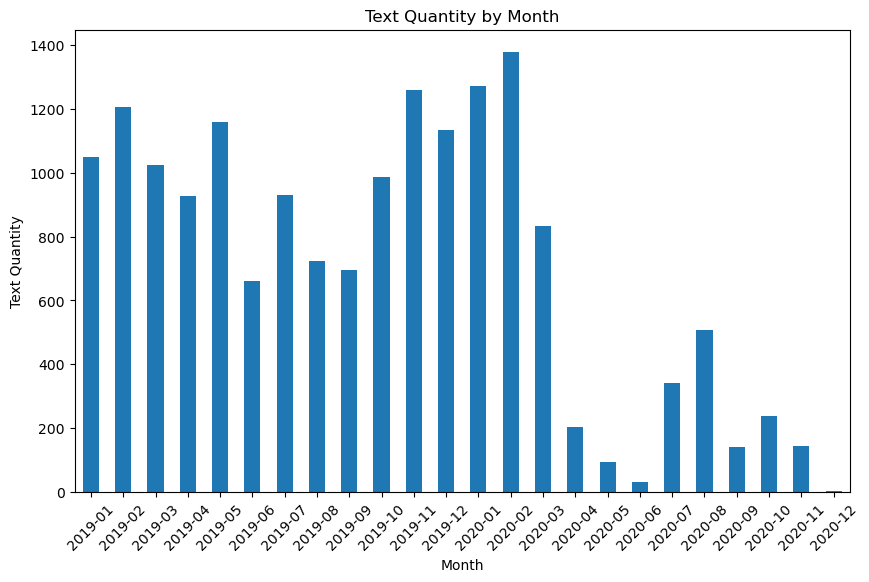

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'time' is a datetime column, if not, you may need to convert it
df['source_created_at'] = pd.to_datetime(df['source_created_at'])

# Extract the month and year from the 'time' column
df['month'] = df['source_created_at'].dt.to_period('M')

# Group by month and count the number of text entries
monthly_counts = df.groupby('month').size()

# Plot the data
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar')
plt.title('Text Quantity by Month')
plt.xlabel('Month')
plt.ylabel('Text Quantity')
plt.xticks(rotation=45)
plt.show()


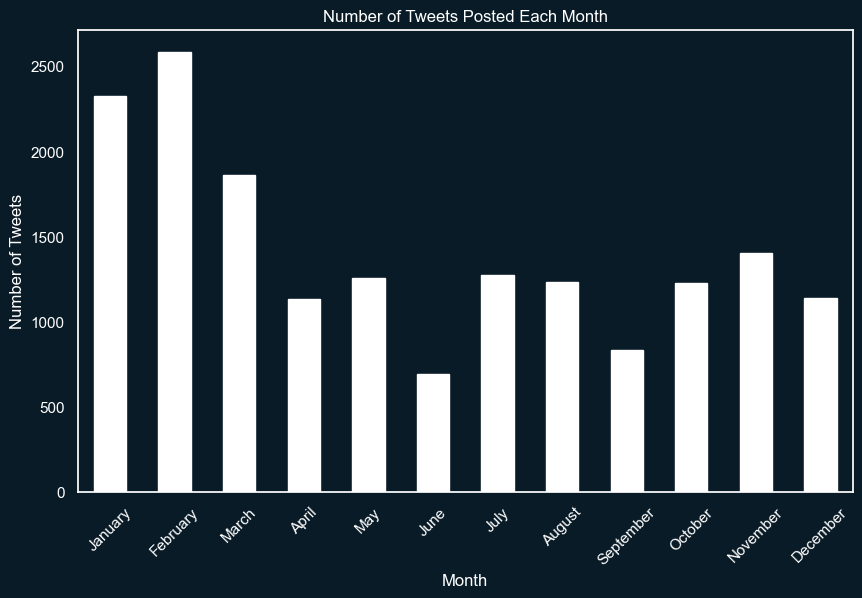

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a column named 'source_created_at'
# Convert 'source_created_at' column to datetime format
df['source_created_at'] = pd.to_datetime(df['source_created_at'])

# Extract the month from the 'source_created_at' column
df['month'] = df['source_created_at'].dt.month

# Count the number of tweets in each month
tweet_counts = df['month'].value_counts().sort_index()

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = tweet_counts.plot(kind='bar', color='white')  # Set bar color to white
plt.title('Number of Tweets Posted Each Month', color='white')  # Set title color
plt.xlabel('Month', color='white')  # Set x-axis label color
plt.ylabel('Number of Tweets', color='white')  # Set y-axis label color

# Set background color to #091B27
fig.set_facecolor('#091B27')

# Set text color to white
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set the x-axis labels to month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(tweet_counts.index - 1, month_names, rotation=45, color='white')

# Set grid color to #091B27
ax.yaxis.grid(color='#091B27')  # Set y-axis grid color
ax.xaxis.grid(color='#091B27')  # Set x-axis grid color

# Set axes background color to #091B27
ax.set_facecolor('#091B27')

# Show the plot
plt.show()


Data is collected in all months of the year

In [ ]:
#Show the beginning and end time of the dataset
print(df['source_created_at'].min())
print(df['source_created_at'].max())

2019-01-16 10:41:46
2020-12-01 07:49:12.003000


In [ ]:
import pandas as pd

# Assuming df contains your dataset and 'source_created_at' is the column with tweet times
# Convert 'source_created_at' column to datetime if it's not already in datetime format
df['source_created_at'] = pd.to_datetime(df['source_created_at'])

# Filter out January 2018 and January 2019
filtered_df = df[~((df['source_created_at'].dt.year == 2018) & (df['source_created_at'].dt.month == 1)) &
                 ~((df['source_created_at'].dt.year == 2019) & (df['source_created_at'].dt.month == 1))]

# Create a new column 'year' to store the year
filtered_df['year'] = filtered_df['source_created_at'].dt.year

# Create a new column 'month' to store the month
filtered_df['month'] = filtered_df['source_created_at'].dt.month

# Group by year and month, and count the number of tweets
tweet_counts = filtered_df.groupby(['year', 'month']).size().reset_index(name='tweet_count')

# Display the result
print(tweet_counts)


    year  month  tweet_count
0   2019      2         1206
1   2019      3         1024
2   2019      4          929
3   2019      5         1159
4   2019      6          661
5   2019      7          931
6   2019      8          725
7   2019      9          695
8   2019     10          988
9   2019     11         1261
10  2019     12         1134
11  2020      1         1272
12  2020      2         1380
13  2020      3          834
14  2020      4          204
15  2020      5           94
16  2020      6           32
17  2020      7          341
18  2020      8          507
19  2020      9          140
20  2020     10          236
21  2020     11          143
22  2020     12            2


C:\Users\MehmetCemAkuras\AppData\Local\Temp\ipykernel_18536\3988584199.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['source_created_at'].dt.year
C:\Users\MehmetCemAkuras\AppData\Local\Temp\ipykernel_18536\3988584199.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['source_created_at'].dt.month


In [ ]:
#Find used data sources by source column
df['source'].value_counts()


brandwatch    15548
sprinklr       1401
Name: source, dtype: int64

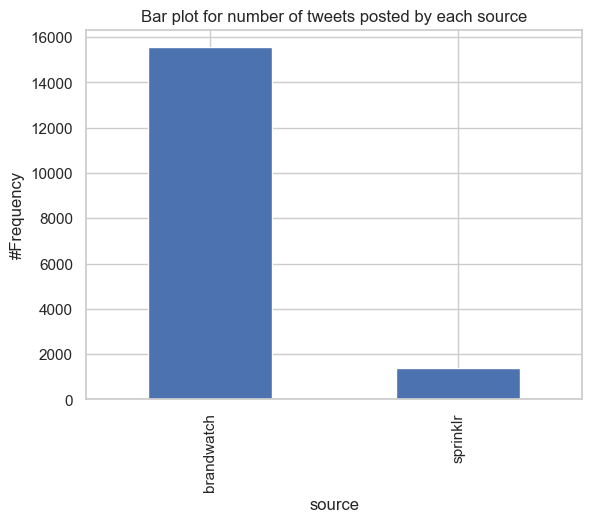

In [ ]:
#Draw a bar plot for number of tweets posted by each source
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
source = df['source'].value_counts()
source.plot.bar()
plt.title('Bar plot for number of tweets posted by each source')
plt.ylabel('#Frequency', fontsize=12)
plt.xlabel('source', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Data is collected from two different sources

In [ ]:
#count how many languages are used
df['language'].value_counts()

en-GB    10051
en        6898
Name: language, dtype: int64

In [ ]:
from langdetect import detect

def detect_language(text):
    try:
        language = detect(text)
        return language
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

# Apply language detection to the 'text' column and create a new column 'language_check'
df['language_check'] = df['text'].apply(detect_language)

In [ ]:
#show values of language_check column
df['language_check'].value_counts()

en    16935
nl        4
tr        1
tl        1
fr        1
ca        1
it        1
da        1
id        1
fi        1
sv        1
af        1
Name: language_check, dtype: int64

In [ ]:
# Filter rows where 'language' column contains both 'en' and 'en-GB' and 'language_check' is 'en'
mismatched_rows = df[(df['language'].str.contains('en')) & (df['language_check'] == 'en')]

# Print the mismatched rows
print(mismatched_rows)

            source_created_at           author_id  \
0     2020-09-18 21:56:20.798           593731316   
1     2020-10-13 07:31:53.122  745583289520496640   
2     2020-10-26 19:27:24.695           303134761   
3     2020-10-26 19:28:49.281           303134761   
4     2020-09-28 11:59:41.212            56427671   
...                       ...                 ...   
16944 2019-07-11 07:34:35.000            24940900   
16945 2020-08-10 11:19:10.181            63559912   
16946 2020-08-29 09:51:10.833           277455263   
16947 2020-11-02 12:06:06.967          3050957613   
16948 2020-11-02 12:06:06.967          3050957613   

                                                    text      source language  \
0      @DSisourath The Thameslink core between London...    sprinklr       en   
1      @DulwichHistory Loving the complaint about peo...    sprinklr       en   
2      @SW_Help .And yet you have no toilets on some ...    sprinklr       en   
3      @SW_Help you have no toilets on 

***IT SEEN THAT ALL TWEETS ARE WRITTEN IN ENGLISH***

Data is collected mostly in English

In [ ]:
#explote length of text
df['text_length'] = df['text'].str.len()
#preview length of text
df['text_length'].head()

0    134
1    132
2    163
3    186
4    265
Name: text_length, dtype: int64

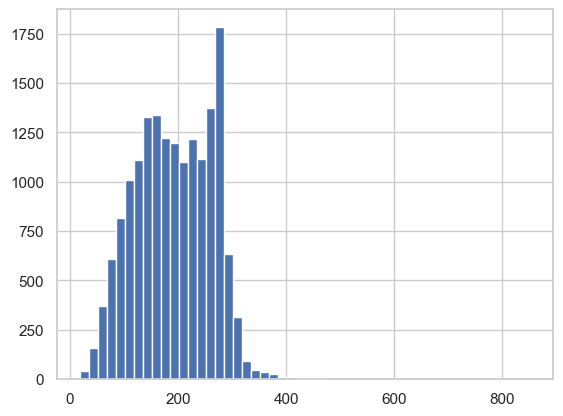

In [ ]:
#create a histogram of text length
import matplotlib.pyplot as plt
df['text_length'].hist(bins=50)
plt.show()

C:\Users\MehmetCemAkuras\AppData\Local\Temp\ipykernel_18536\4051032598.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'negative'], color="Red", shade=True)
C:\Users\MehmetCemAkuras\AppData\Local\Temp\ipykernel_18536\4051032598.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'positive'], color="Green", shade=True)
C:\Users\MehmetCemAkuras\AppData\Local\Temp\ipykernel_18536\4051032598.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'neutral'], c

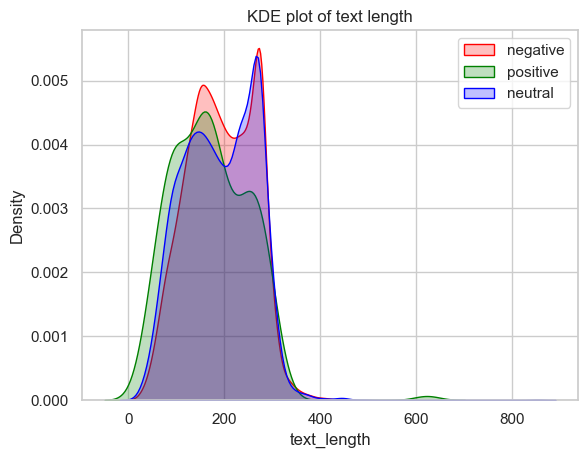

In [ ]:
#create a kdeplot of text length if labels_sentiment_0_sentiment is negative with red color
#and if labels_sentiment_0_sentiment is positive with green color on the same plot
import seaborn as sns
sns.set(style="whitegrid")
sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'negative'], color="Red", shade=True)
sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'positive'], color="Green", shade=True)
sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'neutral'], color="Blue", shade=True)
plt.legend(['negative', 'positive', 'neutral'])
plt.title('KDE plot of text length')
plt.show()

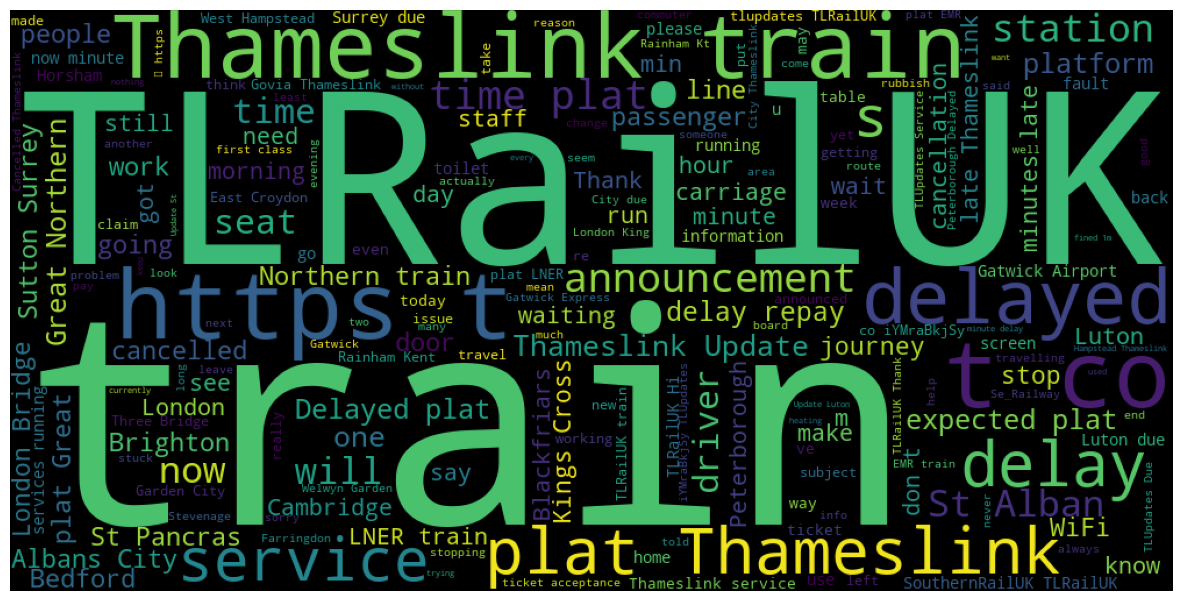

In [ ]:
#Plot a wordcloud of most used 100 words
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(df['text']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MehmetCemAkuras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


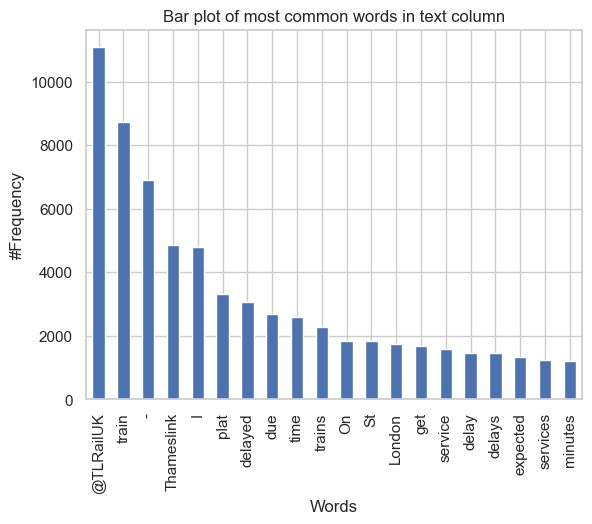

In [ ]:
#Make a list of most common words in text column and show how many times they are used for top 20
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:20]
freq.plot.bar()
plt.title('Bar plot of most common words in text column')
plt.ylabel('#Frequency', fontsize=12)
plt.xlabel('Words', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd

# Assuming df is your DataFrame with a column named 'text'
# Make sure 'text' column is of type string or object
# You can check the data type using df['text'].dtype

stop = stopwords.words('english')
df['text'] = df['text'].astype(str)  # Make sure 'text' is of string type
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:20]
print(freq)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MehmetCemAkuras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


@TLRailUK     11081
train          8718
-              6914
Thameslink     4857
I              4803
plat           3304
delayed        3056
due            2673
time           2608
trains         2268
On             1853
St             1839
London         1755
get            1678
service        1591
delay          1470
delays         1462
expected       1343
services       1226
minutes        1201
dtype: int64


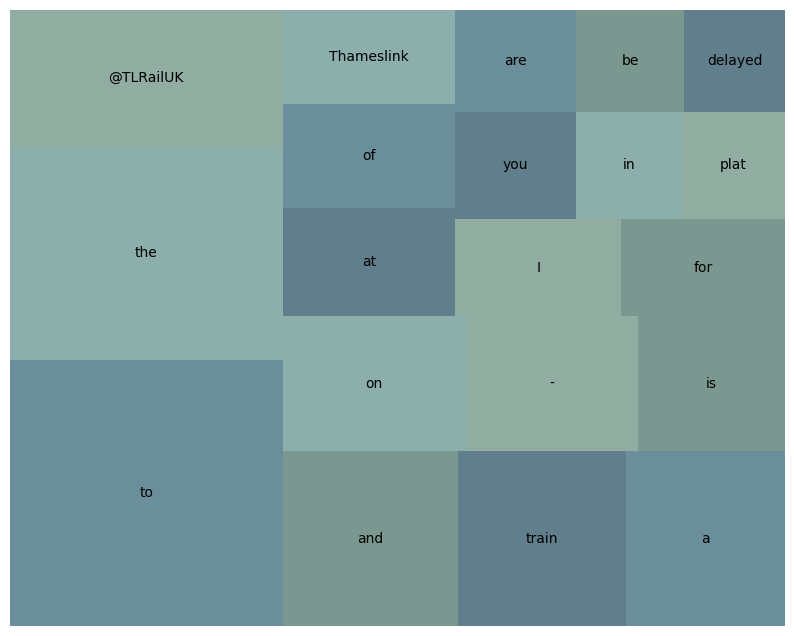

In [87]:
#Create a tree map of most common words in text column except gaps
import matplotlib.pyplot as plt
import squarify
from wordcloud import WordCloud
# Assuming df is your DataFrame and it contains a 'text' column
# Generate word frequencies for the top 20 words
word_frequencies = df['text'].str.split(expand=True).stack().value_counts().head(20)
# Create labels and sizes for the treemap
labels = word_frequencies.index
sizes = word_frequencies.values
# Create a color palette (optional)
colors = ['#2c5f71', '#5b8d89', '#628b7b', '#436d61', '#1d475c']
# Create the treemap
plt.figure(figsize=(10, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7)
plt.axis('off')
# Display the treemap
#Change colour palette to blue green
plt.set_cmap('PuBuGn')

plt.show()


***STOP WORDS NEED TO BE REMOVED***

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MehmetCemAkuras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


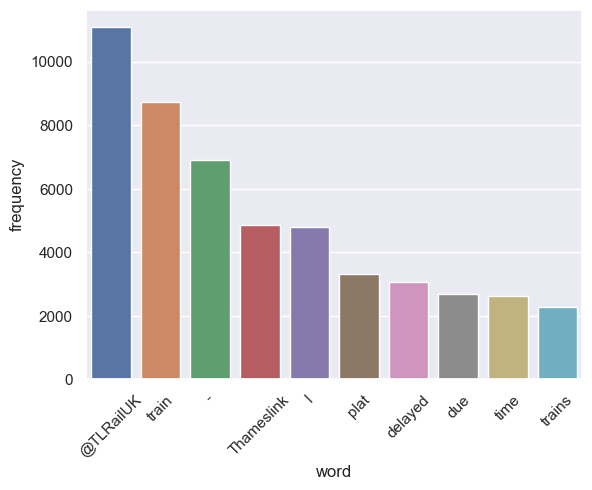

In [ ]:
#Create a bar chart to visualize the most frequent words in the text column
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Counter(" ".join(df['text']).split()).most_common(10)
#Create a bar chart to visualize the most frequent words in the text column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
Counter(" ".join(df['text']).split()).most_common(10)
most_common_words = Counter(" ".join(df['text']).split()).most_common(10)
most_common_words = pd.DataFrame(most_common_words)
most_common_words.columns = ['word', 'frequency']
most_common_words
sns.barplot(x='word', y='frequency', data=most_common_words)
plt.xticks(rotation=45)
plt.show()

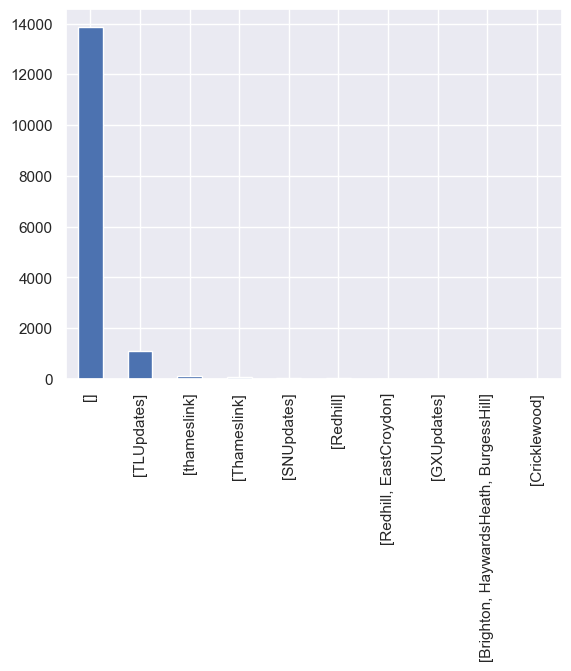

[]    13866
Name: hashtags, dtype: int64


In [ ]:
# Analyze the frequency of different hashtags in text column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import re
df['hashtags'] = df['text'].apply(lambda x: re.findall(r"#(\w+)", x))
df['hashtags'].head()
df['hashtags'].value_counts().head(10)
df['hashtags'].value_counts().head(10).plot.bar()
plt.show()

#Write most frequent hashtag
df['hashtags'].value_counts().head(1)
print(df['hashtags'].value_counts().head(1))


In [ ]:
#Show most frequent hashtag and its text columns for top 1
df[['hashtags', 'text']][df['hashtags'] == 'coronavirus'].head(1)
print(df[['hashtags', 'text']][df['hashtags'] == 'coronavirus'].head(1))

Empty DataFrame
Columns: [hashtags, text]
Index: []


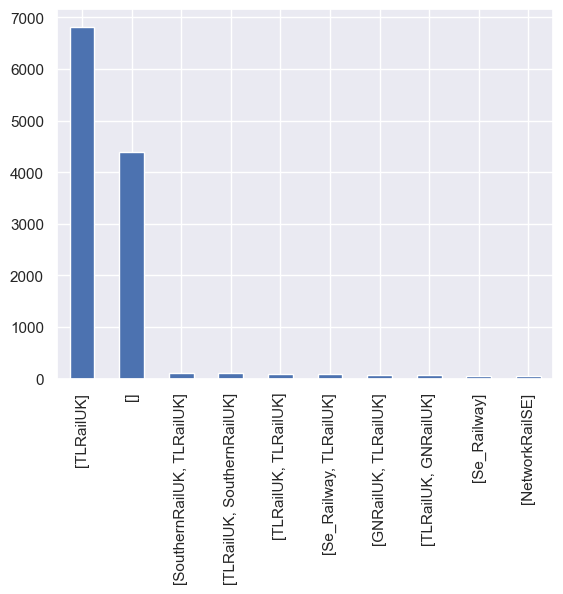

In [ ]:
# Analyze the frequency of different mentions in text column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import re
df['mentions'] = df['text'].apply(lambda x: re.findall(r"@(\w+)", x))
df['mentions'].head()
df['mentions'].value_counts().head(10)
df['mentions'].value_counts().head(10).plot.bar()
plt.show()

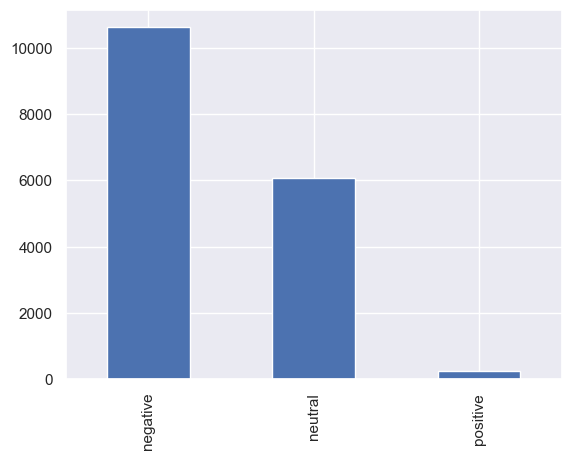

In [ ]:
#Analyze the sentiment of the tweets by labels_sentiment_0_sentiment column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
df['labels_sentiment_0_sentiment'].value_counts()
df['labels_sentiment_0_sentiment'].value_counts().plot.bar()
plt.show()

In [ ]:
import plotly.graph_objects as go

# Define colors
colors = ['#FFFFFF', '#009285', '#006159']

# Define custom labels
custom_labels = ['Negative', 'Neutral', 'Positive']

# Create a Funnel Chart
fig = go.Figure(go.Funnelarea(
    text=custom_labels,  # Set custom labels
    values=df['labels_sentiment_0_sentiment'].value_counts().values,
    title={"position": "top center", "text": "Funnel-Chart of the Sentiment", "font": {"color": "white"}},
    marker=dict(colors=colors)
))

# Set background color to #091B27
fig.update_layout(paper_bgcolor='#091B27')

fig.show()


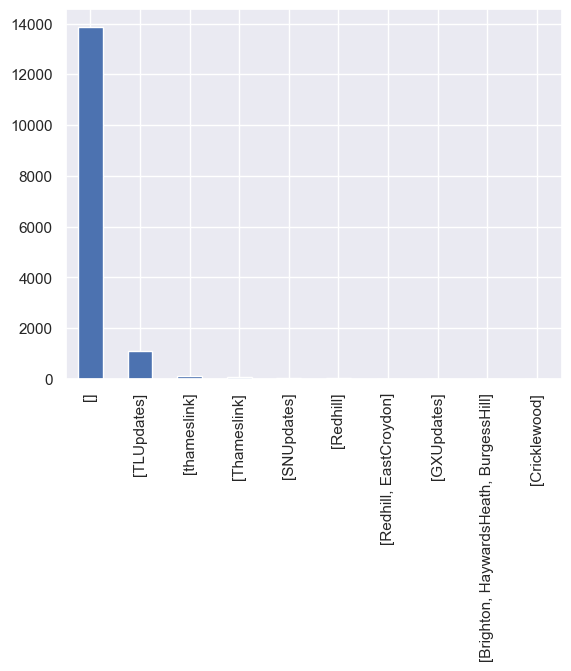

In [ ]:
#Check most used hashtags in text column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import re
df['hashtags'] = df['text'].apply(lambda x: re.findall(r"#(\w+)", x))
df['hashtags'].head()
df['hashtags'].value_counts().head(10)
df['hashtags'].value_counts().head(10).plot.bar()
plt.show()

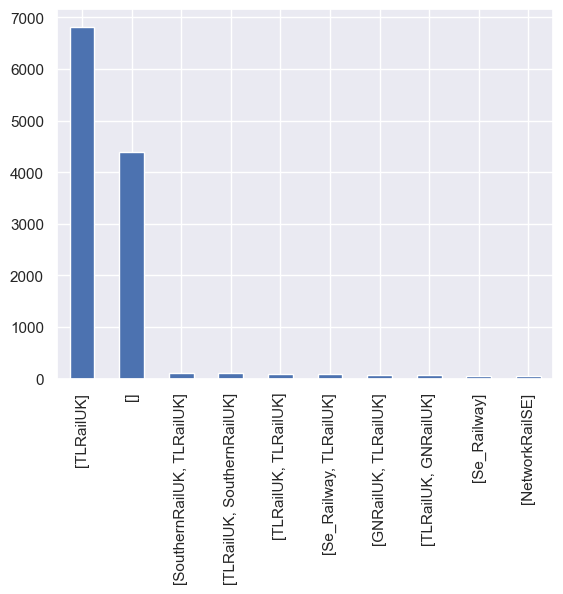

In [ ]:
#Check most used mentions in the text column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import re
df['mentions'] = df['text'].apply(lambda x: re.findall(r"@(\w+)", x))
df['mentions'].head()
df['mentions'].value_counts().head(10)
df['mentions'].value_counts().head(10).plot.bar()
plt.show()

In [22]:
#Check labels_sentiment_0_sentiment and labels_topic_0_topic together by using a pivot table
df.pivot_table(index='labels_sentiment_0_sentiment', columns='labels_topic_0_topic', values='text', aggfunc='count', fill_value=0)


labels_topic_0_topic,air conditioning,announcements,brakes,covid,delays,doors,floor,handrails,hvac,noise,...,seats,service,station,tables,tickets/seat_reservations,toilets,train_general,vandalism,wifi,windows
labels_sentiment_0_sentiment,,,,,,,,,,,,,,,,,,,,,
negative,153,197,22,241,5851,117,36,2,120,42,...,216,605,492,131,211,200,199,196,410,36
neutral,58,115,21,120,3156,79,9,0,50,33,...,57,249,241,55,62,77,169,76,184,13
positive,41,3,1,14,16,1,0,0,2,2,...,10,30,21,3,0,5,17,1,26,1


In [29]:
#Create a new column named sentiment_ratio that gives -1 for negative, 0 for neutral and 1 for positive
df['sentiment_ratio'] = df['labels_sentiment_0_sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})
#Multiply total number of each unique value of labels_topic_0_topic with sentiment_ratio and sum them, then divide by total number of each unique value of labels_topic_0_topic
df.groupby('labels_topic_0_topic')['sentiment_ratio'].sum()/df['labels_topic_0_topic'].value_counts()

air conditioning            -0.444444
announcements               -0.615873
brakes                      -0.477273
covid                       -0.605333
delays                      -0.646681
doors                       -0.588832
floor                       -0.800000
handrails                   -1.000000
hvac                        -0.686047
noise                       -0.519481
none                        -0.437500
plugs                       -0.651852
roof                        -0.466667
seats                       -0.727915
service                     -0.650452
station                     -0.624668
tables                      -0.677249
tickets/seat_reservations   -0.772894
toilets                     -0.691489
train_general               -0.472727
vandalism                   -0.714286
wifi                        -0.619355
windows                     -0.700000
dtype: float64

In [ ]:
#Draw a 

In [26]:
#Give -1 to negative, 0 to neutral and 1 to positive sentiment and create a new column named sentiment
df['sentiment'] = df['labels_sentiment_0_sentiment'].apply(lambda x: -1 if x == 'negative' else 0 if x == 'neutral' else 1)

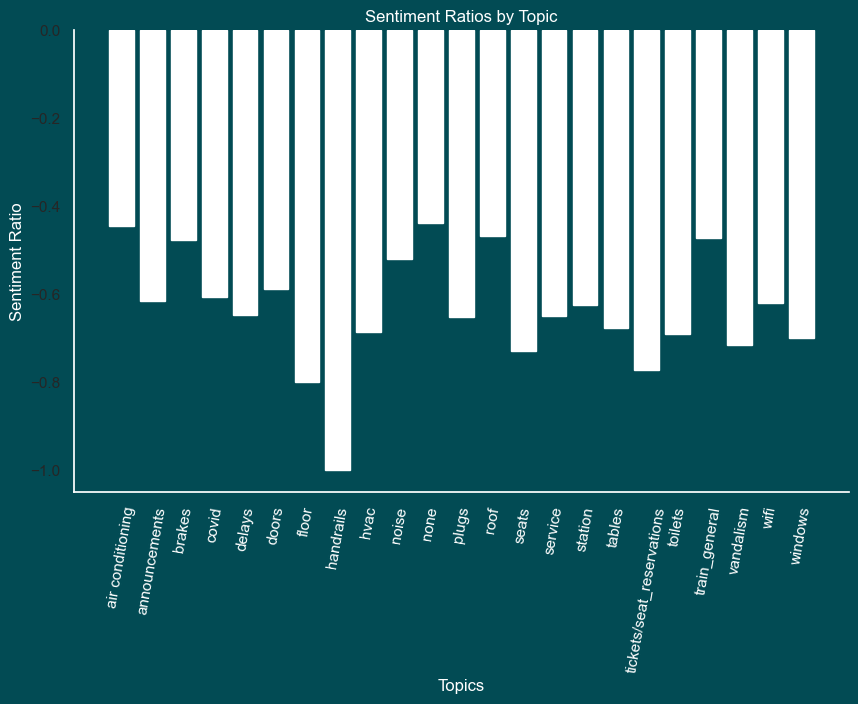

In [35]:
# Calculate sentiment ratio for each topic
sentiment_ratios = (df.groupby('labels_topic_0_topic')['labels_sentiment_0_sentiment']
                     .apply(lambda x: (x == 'positive').sum() - (x == 'negative').sum())
                     .div(df['labels_topic_0_topic'].value_counts()))

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(sentiment_ratios.index, sentiment_ratios.values, color='white')
plt.title('Sentiment Ratios by Topic', color='white')  # Change title color to white
plt.xlabel('Topics', color='white')  # Change x-axis label color to white
plt.ylabel('Sentiment Ratio', color='white')  # Change y-axis label color to white
plt.xticks(rotation=80, color='white')  # Change x-axis ticks color to white

# Define colors to match the second graph
colors = ['#024B54']

# Set background color
fig = plt.gcf()
fig.set_facecolor('#024B54')

# Set grid color to #091B27
ax = plt.gca()
ax.yaxis.grid(color='#024B54')  # Set y-axis grid color
ax.xaxis.grid(color='#024B54')  # Set x-axis grid color

# Set axes background color to #091B27
ax.set_facecolor('#024B54')

# Set bar colors to white
for bar in bars:
    bar.set_facecolor('white')

# Remove frame but keep axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')  # Set left spine color to white
ax.spines['bottom'].set_color('white')  # Set bottom spine color to white

# Set x-axis label color to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Manually set y-axis label color to white
plt.ylabel('Sentiment Ratio', color='white')

plt.show()


In [45]:
#Show text column which includes "tlupdate" word
df[df['text'].str.contains('tlupdate')]['text']
#count how many tweets include "tlupdate" word
df[df['text'].str.contains('tlupdate')]['text'].count()

473

In [145]:
#Show top10 author_id who use "tlupdate" word
df[df['text'].str.contains('tlupdate')]['author_id'].value_counts().head(10)

294299977                45
294299977.0              21
320797050.0              20
3033380985.0             13
320797050                10
9.927213452208371e+17    10
7.427586006706463e+17    10
992721345220837376       10
3033380985               9 
447976488                9 
Name: author_id, dtype: int64

In [148]:
#Find outliers of source_created_at column
import pandas as pd

# Assuming df is your DataFrame with a 'source_created_at' column

# Convert 'source_created_at' to datetime if it's not already
df['source_created_at'] = pd.to_datetime(df['source_created_at'])

# Calculate the IQR
Q1 = df['source_created_at'].quantile(0.25)
Q3 = df['source_created_at'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['source_created_at'] < lower_bound) | (df['source_created_at'] > upper_bound)]

# Print the outliers
print(outliers)


Empty DataFrame
Columns: [source_created_at, author_id, text, source, language, longitude, latitude, id, labels_topic_0_tweet_id, labels_topic_0_user_id, labels_topic_0_relevant, labels_topic_0_topic, labels_topic_0_ground_truth, labels_topic_0_id, labels_sentiment_0_tweet_id, labels_sentiment_0_user_id, labels_sentiment_0_sentiment, labels_sentiment_0_ground_truth, labels_sentiment_0_id, source_id, combined_text]
Index: []

[0 rows x 21 columns]


In [149]:
#Find outliers of text_length
import pandas as pd

# Assuming df is your DataFrame with a 'text' column

# Calculate the length of each text
df['text_length'] = df['text'].str.len()

# Calculate the IQR
Q1 = df['text_length'].quantile(0.25)
Q3 = df['text_length'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['text_length'] < lower_bound) | (df['text_length'] > upper_bound)]

# Print the outliers
print(outliers)



            source_created_at                         author_id  \
2583  2019-05-10 09:52:25.000  2195725435.0                       
2584  2019-05-10 09:52:25.000  2195725435.0                       
2585  2019-05-10 08:57:28.000  8.872797205214862e+17              
3170  2020-01-17 14:43:02.000  142012778                          
3218  2019-05-10 10:13:39.000  9.720438876562186e+17              
3732  2019-02-19 20:31:15.000  1082945206079627265                
10412 2019-11-20 18:25:45.000  42656049                           
12019 2020-07-01 19:15:45.122  9052e1e9352583c51ae9f6adebb1000f   
15306 2020-01-17 15:35:22.000  2195725435                         
15307 2020-01-17 15:43:13.000  2195725435                         
15359 2020-01-08 09:58:13.000  866542768960802817                 

                                                                                                                                                                                                   

In [8]:
def get_all_keys(obj):
    keys = set()
    if isinstance(obj, dict):
        keys.update(obj.keys())
        for value in obj.values():
            keys.update(get_all_keys(value))
    elif isinstance(obj, list):
        for item in obj:
            keys.update(get_all_keys(item))
    return keys

# Get all unique keys
all_keys = get_all_keys(json_data)

# Convert the set to a list to see all unique keys
all_keys_list = list(all_keys)
print(all_keys_list)

['id', 'text', 'source_created_at', 'topic', 'language', 'latitude', 'relevant', 'source', 'labels', 'tweet_id', 'user_id', 'source_id', 'sentiment', 'longitude', 'author_id', 'ground_truth']


In [26]:
#Change column names from source_created_at to Time, author_id to Author, text to Text, source to Source, language to Language,
#longitude to Longitude, latitude to Latitude, id to ID, labels_topic_0_tweet_id to Tweet_ID, labels_topic_0_user_id to User_ID,
# labels_topic_0_relevant to Relevant, labels_topic_0topic to Topic, labels_topic_0_ground_truth to Ground_Truth,
#labels_topic_0_id to Topic_ID, labels_sentiment_0_tweet_id to Tweet_ID, labels_sentiment_0_user_id to User_ID,
#labels_sentiment_0_sentiment to Sentiment, labels_sentiment_0_ground_truth to Sentiment_Ground_Truth, labels_sentiment_0_id to Sentiment_ID,
#source_id to Source_ID
df["Time"] = df["source_created_at"]
df["Author_ID"] = df["author_id"]
df["Text"] = df["text"]
df["Source"] = df["source"]
df["Language"] = df["language"]
df["Longitude"] = df["longitude"]
df["Latitude"] = df["latitude"]
df["ID"] = df["id"]
df["Tweet_ID"] = df["labels_topic_0_tweet_id"]
df["User_ID"] = df["labels_topic_0_user_id"]
df["Relevant"] = df["labels_topic_0_relevant"]
df["Topic"] = df["labels_topic_0_topic"]
df["Topic_Ground_Truth"] = df["labels_topic_0_ground_truth"]
df["Topic_ID"] = df["labels_topic_0_id"]
df["Sentiment_Tweet_ID"] = df["labels_sentiment_0_tweet_id"]
df["Sentiment_User_ID"] = df["labels_sentiment_0_user_id"]
df["Sentiment"] = df["labels_sentiment_0_sentiment"]
df["Sentiment_Ground_Truth"] = df["labels_sentiment_0_ground_truth"]
df["Sentiment_ID"] = df["labels_sentiment_0_id"]
df["Source_ID"] = df["source_id"]

KeyError: 'source_created_at'

In [21]:
def get_all_keys(obj):
    keys = set()
    if isinstance(obj, dict):
        keys.update(obj.keys())
        for value in obj.values():
            keys.update(get_all_keys(value))
    elif isinstance(obj, list):
        for item in obj:
            keys.update(get_all_keys(item))
    return keys

# Get all unique keys
all_keys = get_all_keys(json_data)

# Convert the set to a list to see all unique keys
all_keys_list = list(all_keys)
print(all_keys_list)

['id', 'text', 'source_created_at', 'topic', 'language', 'latitude', 'relevant', 'source', 'labels', 'tweet_id', 'user_id', 'source_id', 'sentiment', 'longitude', 'author_id', 'ground_truth']


In [27]:
df.head()

,Time,Author,Text,Source,Language,Longitude,Latitude,ID,Tweet_ID,User_ID,...,Relevant,Topic,Topic_Ground_Truth,Topic_ID,Sentiment_Tweet_ID,Sentiment_User_ID,Sentiment,Sentiment_Ground_Truth,Sentiment_ID,Source_ID
0,2020-09-18 21:56:20.798000,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,...,True,service,True,8655353b-cc71-1e89-95d5-1c4e6bf200e1,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,negative,True,5ee4d218-65a9-70a0-0964-a5b00e594a41,NaN
1,2020-10-13 07:31:53.122000,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,...,True,delays,True,8aee5c86-6e93-24d4-6d9d-d8a9f2f19cef,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,negative,True,2f8d741f-59cf-d1ab-27f9-5537a9718f94,NaN
2,2020-10-26 19:27:24.695000,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,...,True,toilets,True,2d54f18a-442d-b59b-9daf-0490dc64d21a,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,negative,True,be479c30-17c3-220f-8eae-eaf6fc874431,NaN
3,2020-10-26 19:28:49.281000,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,...,True,toilets,True,01db4b72-b21c-60f9-b627-5a47df56655a,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,negative,True,6df4ba5c-952f-732f-2a7e-4cc6f7d56f61,NaN
4,2020-09-28 11:59:41.212000,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,...,True,seats,True,4fe5177f-8347-1726-c2e9-cc183f16d5b1,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,neutral,True,e5aa618a-c554-6bdb-cb5b-bcdadcaa4e98,NaN


In [49]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Define the mapping of old column names to new column names
column_mapping = {
    'id': 'ID',
    'text': 'Text',
    'source_created_at': 'Time',
    'topic': 'Topic',
    'author_id': 'Author_ID',
    'language' : 'Language',
    'longitude': 'Longitude',
    'latitude': 'Latitude',
    'relevant': 'Relevant',
    'source': 'Source',
    'labels_topic_0_tweet_id': 'Tweet_ID',
    'labels_topic_0_user_id': 'User_ID',
    'labels_topic_0_relevant': 'Relevant',
    'labels_topic_0_topic': 'Topic',
    'labels_topic_0_ground_truth': 'Topic_Ground_Truth',
    'labels_topic_0_id': 'Topic_ID',
    'labels_sentiment_0_tweet_id': 'Sentiment_Tweet_ID',
    'labels_sentiment_0_user_id': 'Sentiment_User_ID',
    'labels_sentiment_0_sentiment': 'Sentiment',
    'labels_sentiment_0_ground_truth': 'Sentiment_Ground_Truth',
    'labels_sentiment_0_id': 'Sentiment_ID',
    'source_id': 'Source_ID'
}

# Rename the columns
df1 = df.rename(columns=column_mapping)

# Print the DataFrame to verify the column names have been changed
print(df.head())  # You can adjust the number of rows to display if needed


            source_created_at           author_id  \
0  2020-09-18 21:56:20.798000           593731316   
1  2020-10-13 07:31:53.122000  745583289520496640   
2  2020-10-26 19:27:24.695000           303134761   
3  2020-10-26 19:28:49.281000           303134761   
4  2020-09-28 11:59:41.212000            56427671   

                                                text    source language  \
0  @DSisourath The Thameslink core between London...  sprinklr       en   
1  @DulwichHistory Loving the complaint about peo...  sprinklr       en   
2  @SW_Help .And yet you have no toilets on some ...  sprinklr       en   
3  @SW_Help you have no toilets on some of your t...  sprinklr       en   
4  @SpeedySticks007 @MrNeilJH @TLRailUK @christia...  sprinklr       en   

   longitude  latitude                                    id  \
0   -0.12574  51.50853  acd7673f-e621-5f1a-d662-df278964a6ea   
1   -0.12574  51.50853  5b92aba8-4b05-6c63-8485-e9c870742137   
2   -0.12574  51.50853  0a799c07-8b76-

In [50]:
df1.head(5)

,Time,Author_ID,Text,Source,Language,Longitude,Latitude,ID,Tweet_ID,User_ID,Relevant,Topic,Topic_Ground_Truth,Topic_ID,Sentiment_Tweet_ID,Sentiment_User_ID,Sentiment,Sentiment_Ground_Truth,Sentiment_ID,Source_ID
0,2020-09-18 21:56:20.798000,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,True,service,True,8655353b-cc71-1e89-95d5-1c4e6bf200e1,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,negative,True,5ee4d218-65a9-70a0-0964-a5b00e594a41,NaN
1,2020-10-13 07:31:53.122000,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,True,delays,True,8aee5c86-6e93-24d4-6d9d-d8a9f2f19cef,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,negative,True,2f8d741f-59cf-d1ab-27f9-5537a9718f94,NaN
2,2020-10-26 19:27:24.695000,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,True,toilets,True,2d54f18a-442d-b59b-9daf-0490dc64d21a,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,negative,True,be479c30-17c3-220f-8eae-eaf6fc874431,NaN
3,2020-10-26 19:28:49.281000,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,True,toilets,True,01db4b72-b21c-60f9-b627-5a47df56655a,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,negative,True,6df4ba5c-952f-732f-2a7e-4cc6f7d56f61,NaN
4,2020-09-28 11:59:41.212000,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,True,seats,True,4fe5177f-8347-1726-c2e9-cc183f16d5b1,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,neutral,True,e5aa618a-c554-6bdb-cb5b-bcdadcaa4e98,NaN


In [51]:
import pandas as pd

# Select specific columns to create a new DataFrame 'df1'
df1 = df1[['Time', 'Author_ID', 'Text', 'Source', 'Topic', 'Sentiment']]

# Print the first 5 rows of 'df1' to verify the selection
print(df1.head(5))


                         Time           Author_ID  \
0  2020-09-18 21:56:20.798000           593731316   
1  2020-10-13 07:31:53.122000  745583289520496640   
2  2020-10-26 19:27:24.695000           303134761   
3  2020-10-26 19:28:49.281000           303134761   
4  2020-09-28 11:59:41.212000            56427671   

                                                Text    Source    Topic  \
0  @DSisourath The Thameslink core between London...  sprinklr  service   
1  @DulwichHistory Loving the complaint about peo...  sprinklr   delays   
2  @SW_Help .And yet you have no toilets on some ...  sprinklr  toilets   
3  @SW_Help you have no toilets on some of your t...  sprinklr  toilets   
4  @SpeedySticks007 @MrNeilJH @TLRailUK @christia...  sprinklr    seats   

  Sentiment  
0  negative  
1  negative  
2  negative  
3  negative  
4   neutral  


In [52]:
df1.head(5)

,Time,Author_ID,Text,Source,Topic,Sentiment
0,2020-09-18 21:56:20.798000,593731316,@DSisourath The Thameslink core between London...,sprinklr,service,negative
1,2020-10-13 07:31:53.122000,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,delays,negative
2,2020-10-26 19:27:24.695000,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,toilets,negative
3,2020-10-26 19:28:49.281000,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,toilets,negative
4,2020-09-28 11:59:41.212000,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,seats,neutral


In [54]:
#Change Time columns format to datetime
df1['Time'] = pd.to_datetime(df1['Time'])
#Remove second and microsecond from Time column
df1['Time'] = df1['Time'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [55]:
df1

,Time,Author_ID,Text,Source,Topic,Sentiment
0,2020-09-18 21:56:20,593731316,@DSisourath The Thameslink core between London...,sprinklr,service,negative
1,2020-10-13 07:31:53,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,delays,negative
2,2020-10-26 19:27:24,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,toilets,negative
3,2020-10-26 19:28:49,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,toilets,negative
4,2020-09-28 11:59:41,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,seats,neutral
...,...,...,...,...,...,...
16944,2019-07-11 07:34:35,24940900,Haha oh man the audio corruption on @TLRailUK ...,brandwatch,announcements,neutral
16945,2020-08-10 11:19:10,63559912,@TLRailUK SweetIs there a plug to charge my ph...,sprinklr,plugs,neutral
16946,2020-08-29 09:51:10,277455263,@TLRailUK now there are far fewer commuters ha...,sprinklr,tables,neutral
16947,2020-11-02 12:06:06,3050957613,@geofftech I am voting for Thameslink. 1. in a...,sprinklr,toilets,neutral


In [56]:
#Show data types of each column
df1.dtypes

Time         object
Author_ID    object
Text         object
Source       object
Topic        object
Sentiment    object
dtype: object

In [69]:
#Change data type of Time column to datetime
df1['Time'] = pd.to_datetime(df1['Time'])
#Change Text column to string
df1['Text'] = df1['Text'].astype(str)
#Change Author_ID column to string
df1['Author_ID'] = df1['Author_ID'].astype(str)
#Change Source column to category
df1['Source'] = df1['Source'].astype('category')
#Change Topic column to category
df1['Topic'] = df1['Topic'].astype('category')
#Change Sentiment column to category
df1['Sentiment'] = df1['Sentiment'].astype('category')

In [ ]:
#Remove second and microsecond from Time column
df1['Time'] = df1['Time'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [71]:
df1

,Time,Author_ID,Text,Source,Topic,Sentiment
0,2020-09-18 21:56:20,593731316,@DSisourath The Thameslink core between London...,sprinklr,service,negative
1,2020-10-13 07:31:53,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,delays,negative
2,2020-10-26 19:27:24,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,toilets,negative
3,2020-10-26 19:28:49,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,toilets,negative
4,2020-09-28 11:59:41,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,seats,neutral
...,...,...,...,...,...,...
16944,2019-07-11 07:34:35,24940900,Haha oh man the audio corruption on @TLRailUK ...,brandwatch,announcements,neutral
16945,2020-08-10 11:19:10,63559912,@TLRailUK SweetIs there a plug to charge my ph...,sprinklr,plugs,neutral
16946,2020-08-29 09:51:10,277455263,@TLRailUK now there are far fewer commuters ha...,sprinklr,tables,neutral
16947,2020-11-02 12:06:06,3050957613,@geofftech I am voting for Thameslink. 1. in a...,sprinklr,toilets,neutral


In [72]:
#Drop duplicated rows by text
df1.drop_duplicates(subset=['Text'], keep=False, inplace=True)

In [73]:
df1.shape

(14730, 6)

In [75]:
#Count duplicate rows regarding Text column
df1[df1.duplicated(['Text'], keep=False)].shape[0]

0

In [76]:
import pandas as pd

# Assuming df1 is your DataFrame with a 'Text' column
# If you haven't already, you can calculate the length of each text
df1['Text_Length'] = df1['Text'].apply(len)

# Calculate summary statistics to identify potential outliers
Q1 = df1['Text_Length'].quantile(0.25)
Q3 = df1['Text_Length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df1[(df1['Text_Length'] < lower_bound) | (df1['Text_Length'] > upper_bound)]

# Display outliers
print(outliers.shape)

#Find row number for each outlier
outliers.index

#Drow whole row for each outlier
df1.drop(outliers.index, inplace=True)

(9, 7)


In [77]:
df1.shape

(14721, 7)

In [78]:
#Remove row if Author_ID wrote more than 111 tweets
df1 = df1.groupby('Author_ID').filter(lambda x: len(x) <= 111)
#Print the shape of the dataset
df1.shape

(11901, 7)

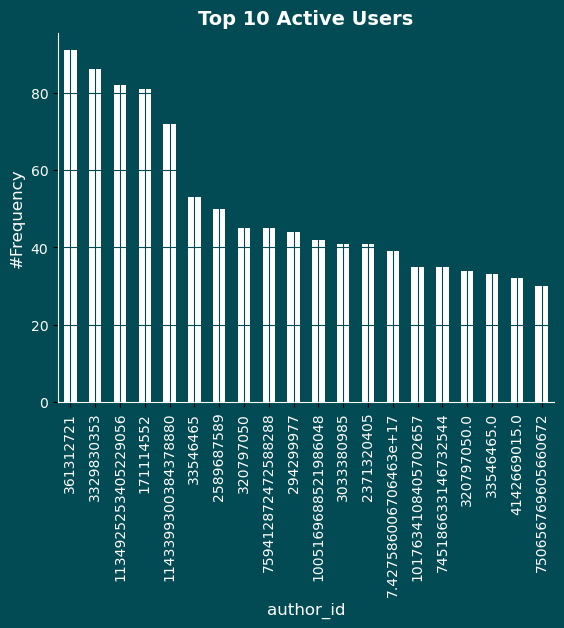

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate some data for demonstration purposes
# Replace this with your actual data
top_20_users = df1['Author_ID'].value_counts().head(20)

# Create a bar plot
top_20_users.plot.bar(color='white')  # Set bar colors to white

plt.title('Top 10 Active Users', color='white', fontsize=14, fontweight='bold')
plt.ylabel('#Frequency', color='white', fontsize=12)
plt.xlabel('author_id', color='white', fontsize=12)
plt.xticks(rotation=90, color='white')  # Set x tick color to white
plt.yticks(color='white')  # Set y tick color to white

# Set background color
fig = plt.gcf()
fig.set_facecolor('#024B54')

# Access the current Axes
ax = plt.gca()

# Set grid color to #024B54
ax.yaxis.grid(color='#024B54')  # Set y-axis grid color
ax.xaxis.grid(color='#024B54')  # Set x-axis grid color

# Set axes background color to #024B54
ax.set_facecolor('#024B54')

# Remove frame but keep axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')  # Set left spine color to white
ax.spines['bottom'].set_color('white')  # Set bottom spine color to white

plt.show()


In [80]:
#Remove common words
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Assuming df1 is your DataFrame with a 'Text' column
# Load stopwords
stop_words = set(stopwords.words('english'))

# Variable to keep track of the number of stopwords removed
stopwords_removed_count = 0

# Function to remove stopwords from a text and count them
def remove_stopwords(text):
    global stopwords_removed_count
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    stopwords_removed_count += (len(words) - len(filtered_words))
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df1['Text'] = df1['Text'].apply(remove_stopwords)

# Print the number of stopwords removed
print(f"Total stopwords removed: {stopwords_removed_count}")

Total stopwords removed: 145637


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MehmetCemAkuras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


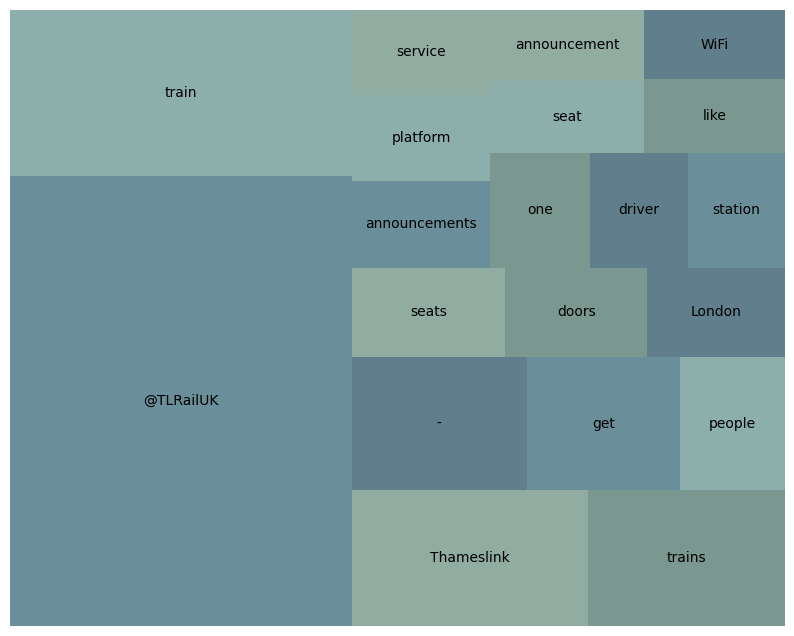

In [85]:
import matplotlib.pyplot as plt
import squarify
from wordcloud import WordCloud

# Generate word frequencies for the top 20 words
word_frequencies = df1['Text'].str.split(expand=True).stack().value_counts().head(20)

# Create labels and sizes for the treemap
labels = word_frequencies.index
sizes = word_frequencies.values

# Create a custom color palette (blue-green)
colors = ['#2c5f71', '#5b8d89', '#628b7b', '#436d61', '#1d475c']

# Create the treemap
plt.figure(figsize=(10, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7)
plt.axis('off')

# Display the treemap
plt.show()


In [82]:
#Remove rows if Topics column is delays
df1 = df1[df1['Topic'] != 'delays']
#Show how many rows are left
df1.shape

(6419, 7)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MehmetCemAkuras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


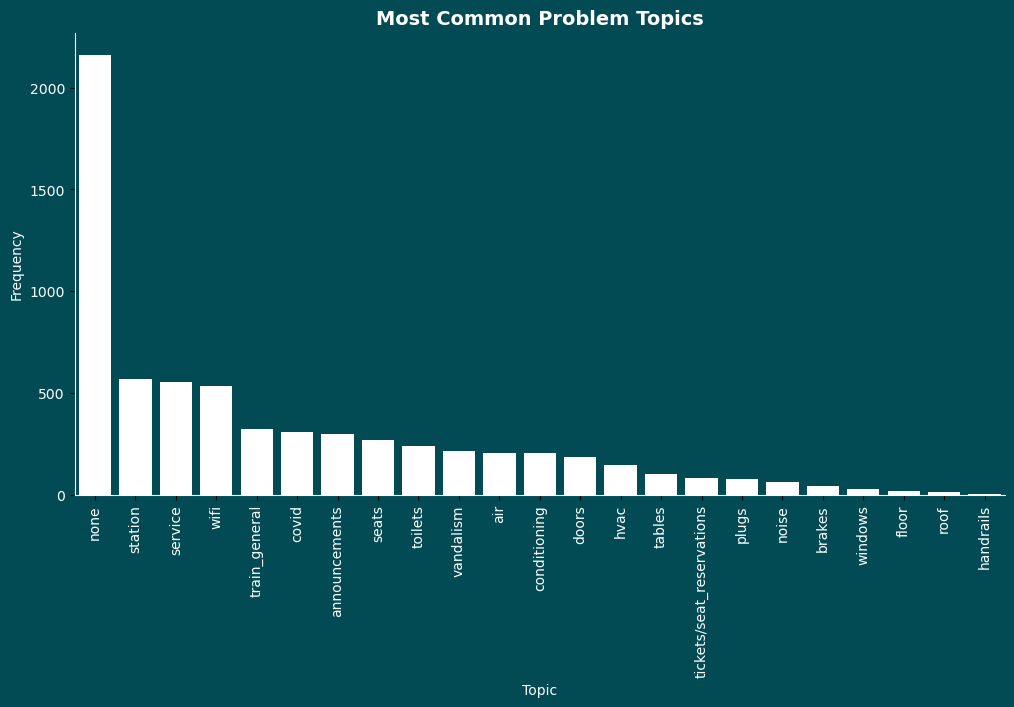

In [84]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Preprocess the data
nltk.download('stopwords')
stop = stopwords.words('english')
df1['Topic'] = df1['Topic'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Count most common words
most_common_words = Counter(" ".join(df1['Topic']).split()).most_common()
most_common_words = pd.DataFrame(most_common_words)
most_common_words.columns = ['word', 'frequency']

# Define colors to match the second graph
colors = ['#024B54']

# Create bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='word', y='frequency', data=most_common_words, palette=colors)
plt.xticks(rotation=90, color='white')
plt.yticks(color='white')
plt.xlabel('Topic', color='white')
plt.ylabel('Frequency', color='white')
plt.title('Most Common Problem Topics', color='white', fontsize=14, fontweight='bold')

# Set background color
fig = plt.gcf()
fig.set_facecolor('#024B54')

# Set grid color to #091B27
ax.yaxis.grid(color='#024B54')  # Set y-axis grid color
ax.xaxis.grid(color='#024B54')  # Set x-axis grid color

# Set axes background color to #091B27
ax.set_facecolor('#024B54')

# Set bar colors to white
for bar in ax.patches:
    bar.set_facecolor('white')
#Remoe grids
ax.grid(False)

#Remove frame but keep axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')  # Set left spine color to white
ax.spines['bottom'].set_color('white')  # Set bottom spine color to white


plt.show()
